<h1>Visualize Them All</h1>
Use the data that is done formatting by the iPython Notebook 'Medalist Analyzer'

In [24]:
import pandas as pd
import sys

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

In [25]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

In [26]:
data = pd.read_csv('generated data/formated-all-1896-2012.csv')

In [27]:
data = data.drop(['Unnamed: 0'], 1)
data.head()

,Discipline,Event,Event gender,Medal,NOC,Sport,Year
0,Taekwondo,- 58 kg,M,Bronze,AFG,Taekwondo,2008
1,Sailing,board (division II),M,Silver,AHO,Sailing,1988
2,Boxing,71-75kg,M,Bronze,ALG,Boxing,1984
3,Boxing,71-75kg,M,Bronze,ALG,Boxing,1996
4,Boxing,75 - 81kg (light-heavyweight),M,Bronze,ALG,Boxing,1984


<h1>Cumulative Gold Medal Counter</h1>
This visualization plots the cumulative gold medals received by each country in each sports
We can know which countries have been dominating which sports and also which countries started to rise as a power.

In [29]:
sports_count = len(list(set(data['Sport'])))
sports_count

43

/Users/wangchi-an/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1900.0, right=1900.0
  'left=%s, right=%s') % (left, right))
/Users/wangchi-an/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2012.0, right=2012.0
  'left=%s, right=%s') % (left, right))
/Users/wangchi-an/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/wangchi-an/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base

ERROR! Session/line number was not unique in database. History logging moved to new session 134


/Users/wangchi-an/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1908.0, right=1908.0
  'left=%s, right=%s') % (left, right))


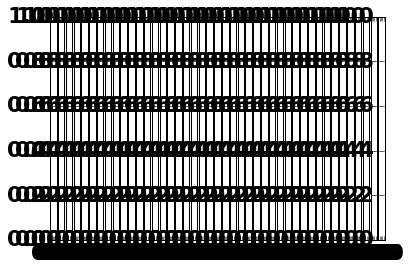

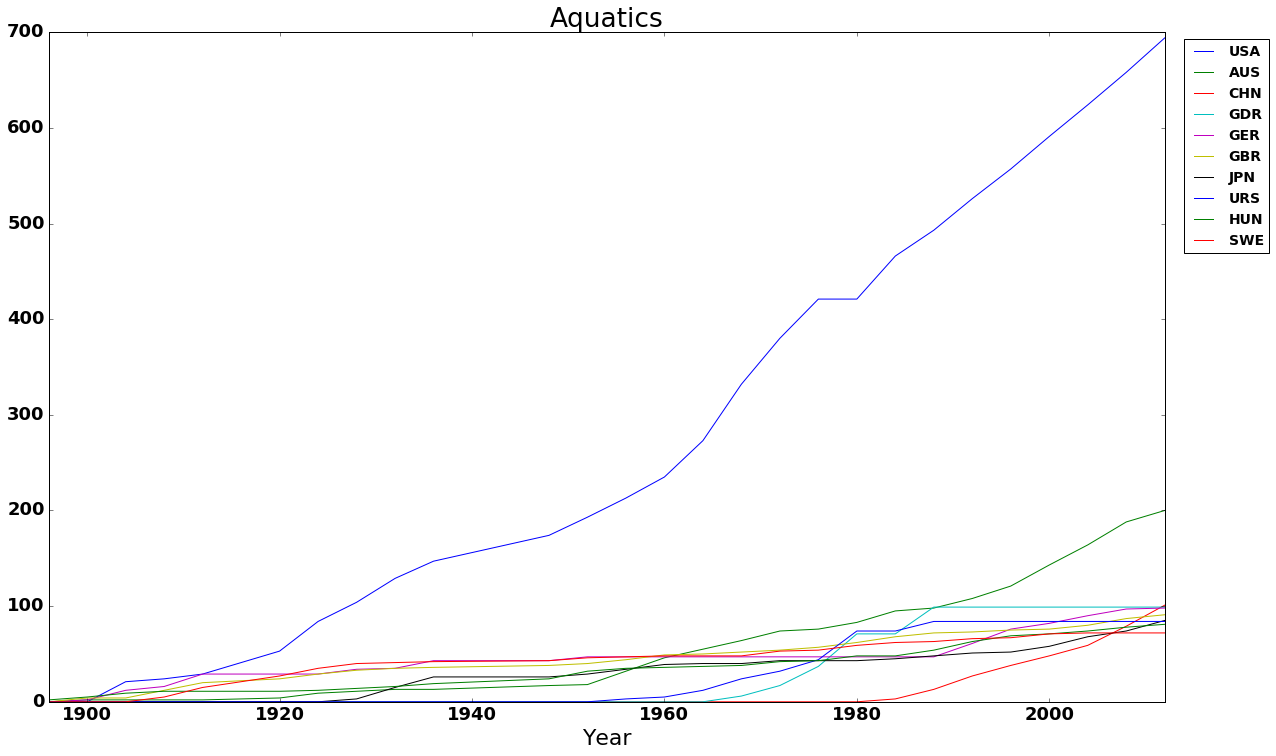

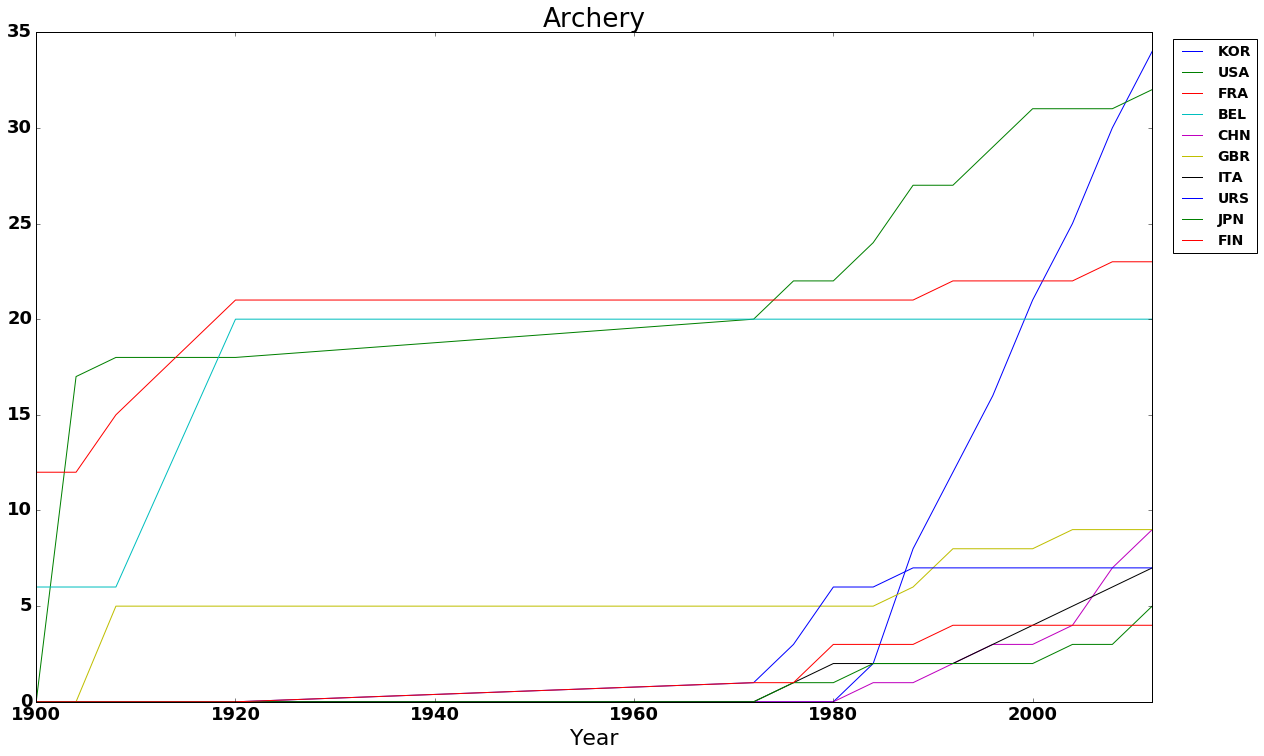

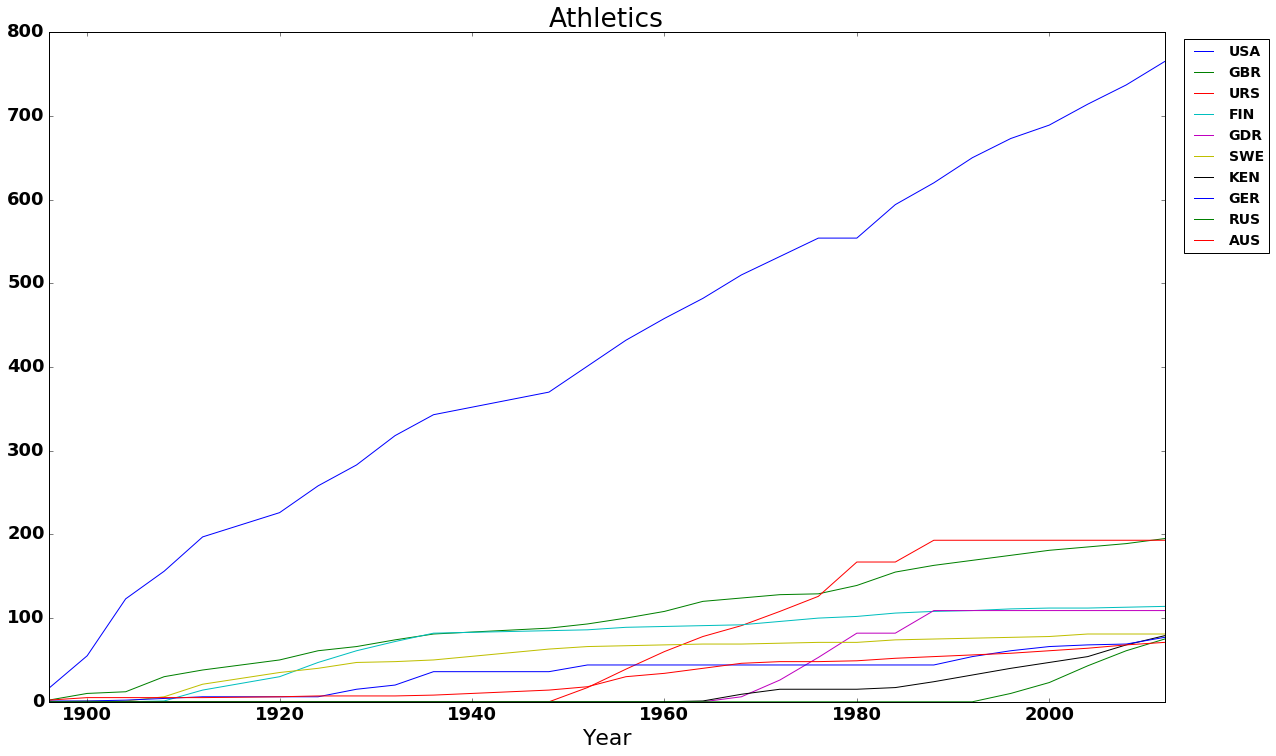

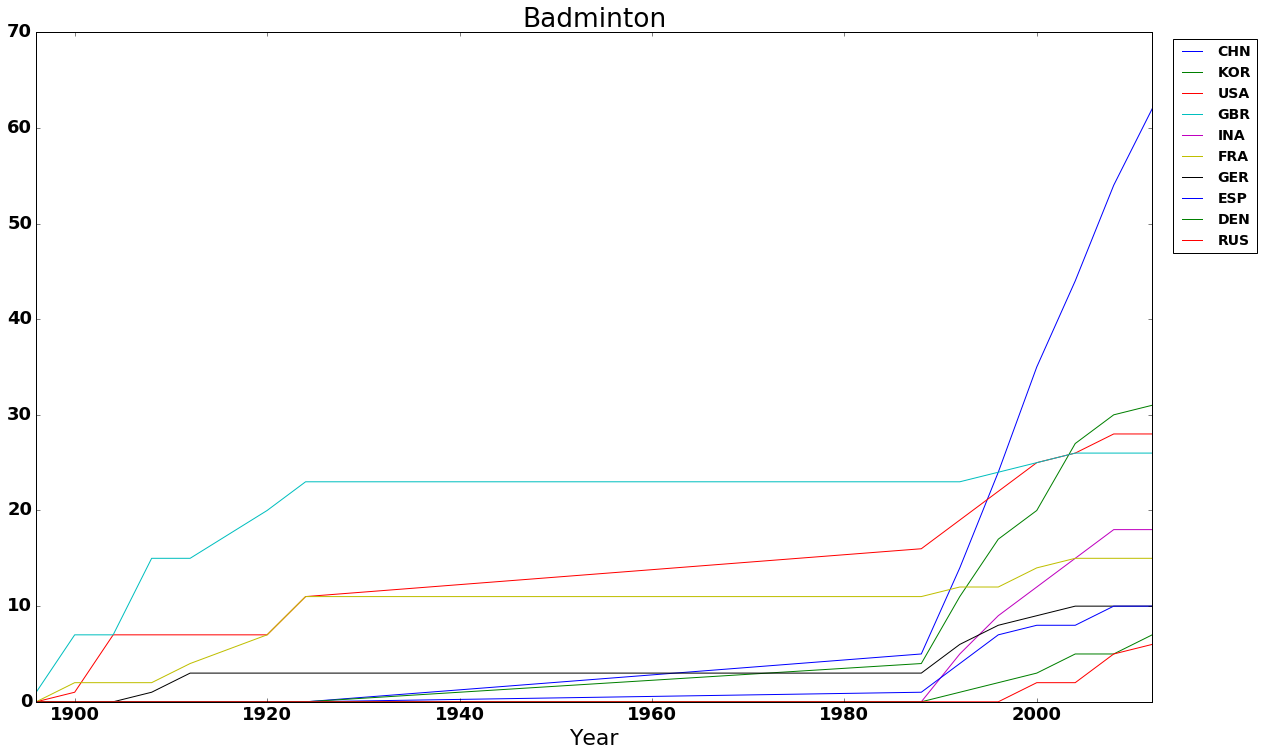

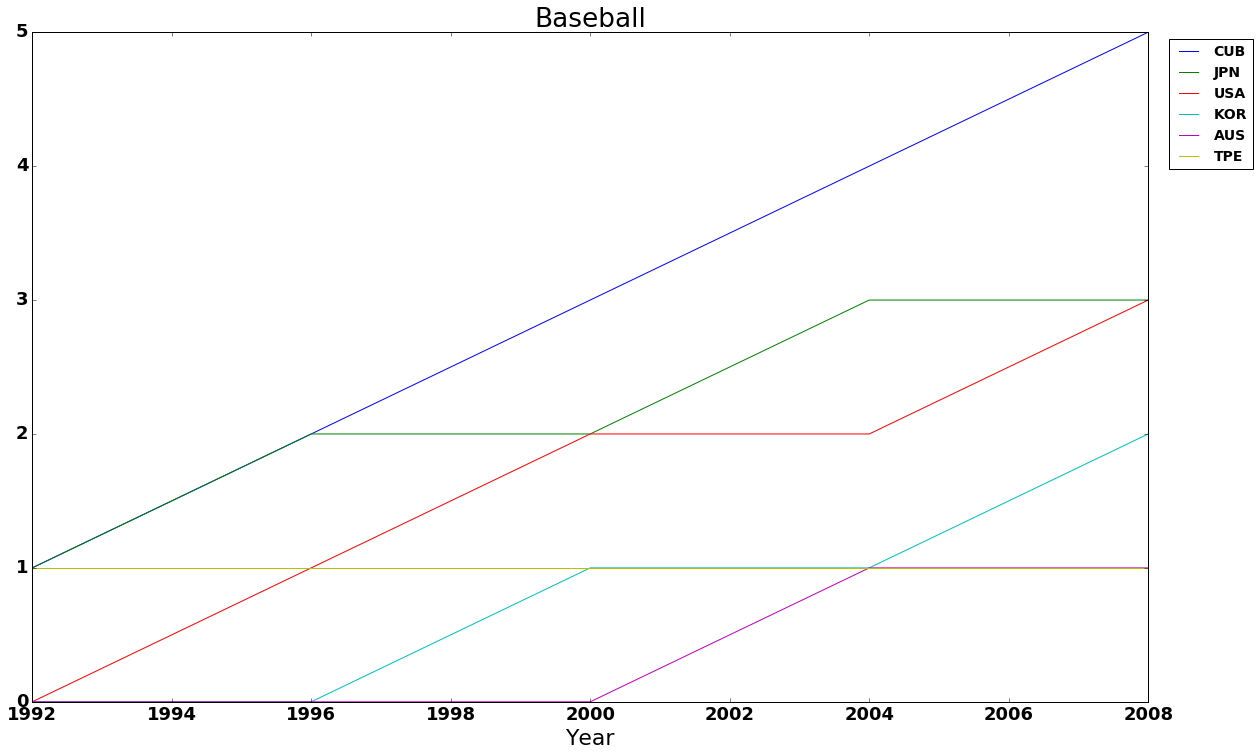

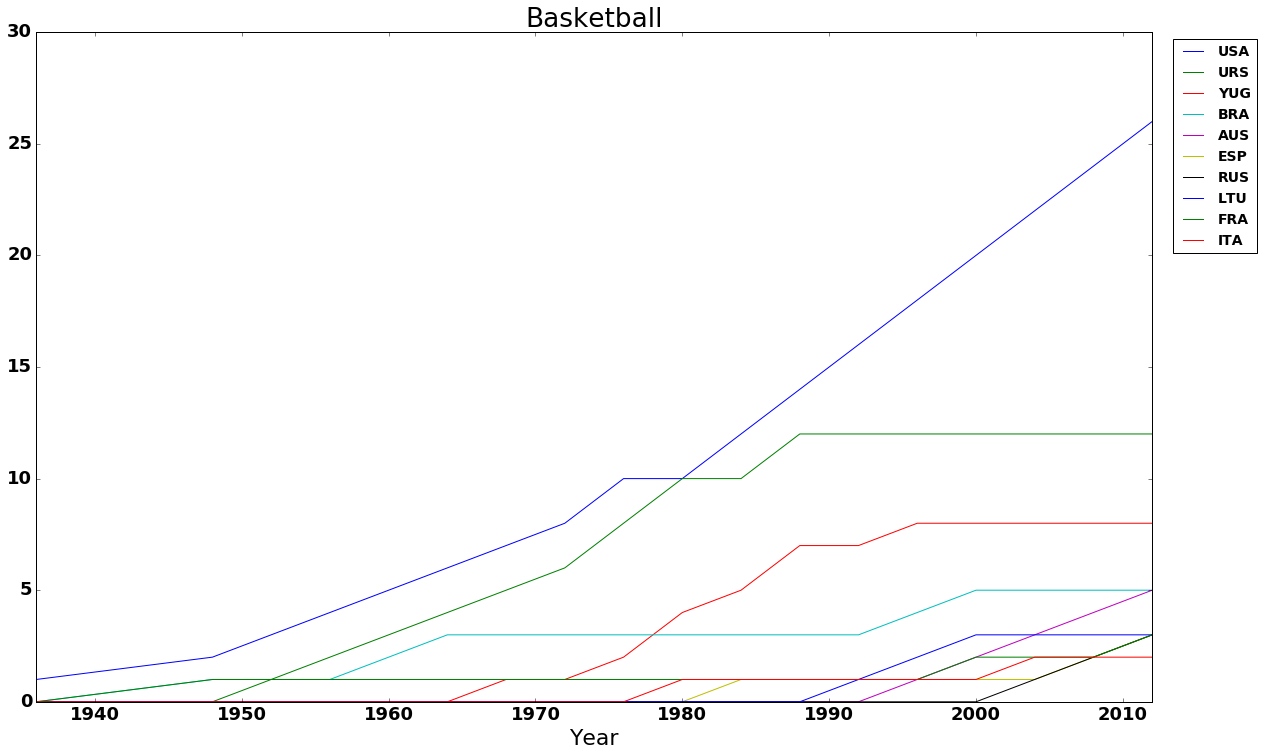

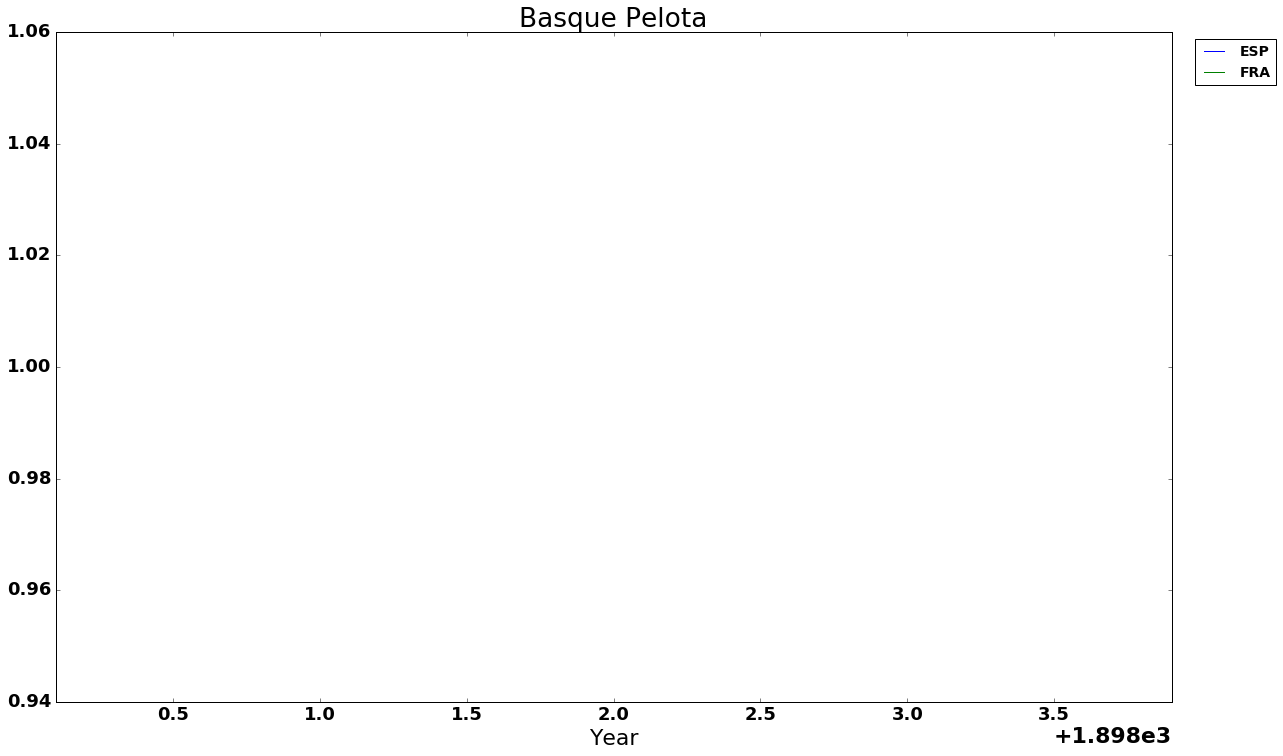

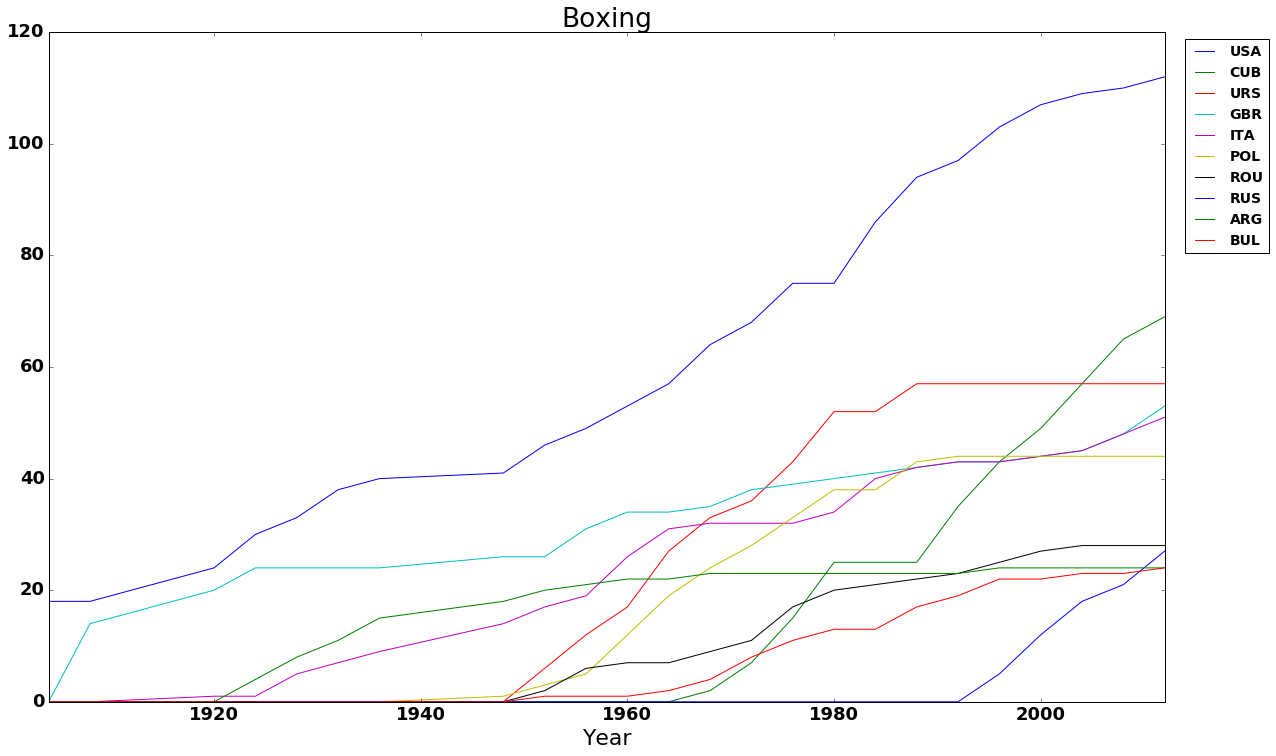

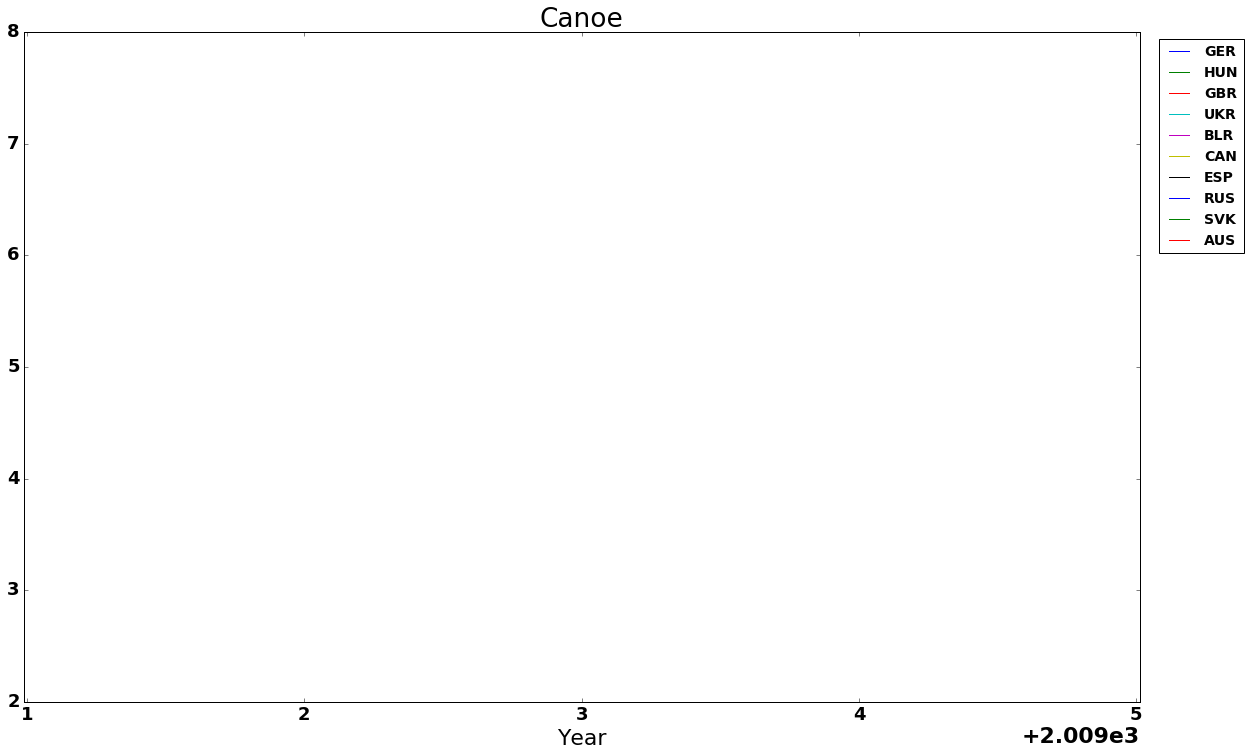

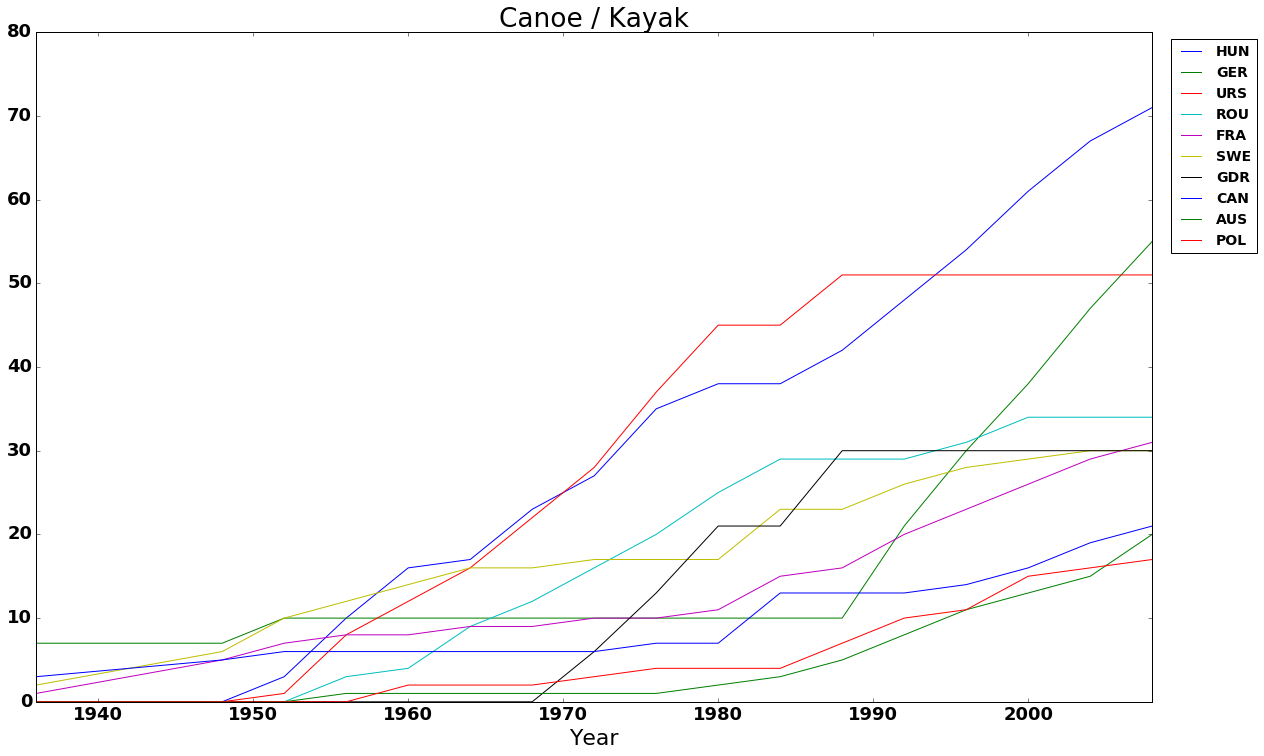

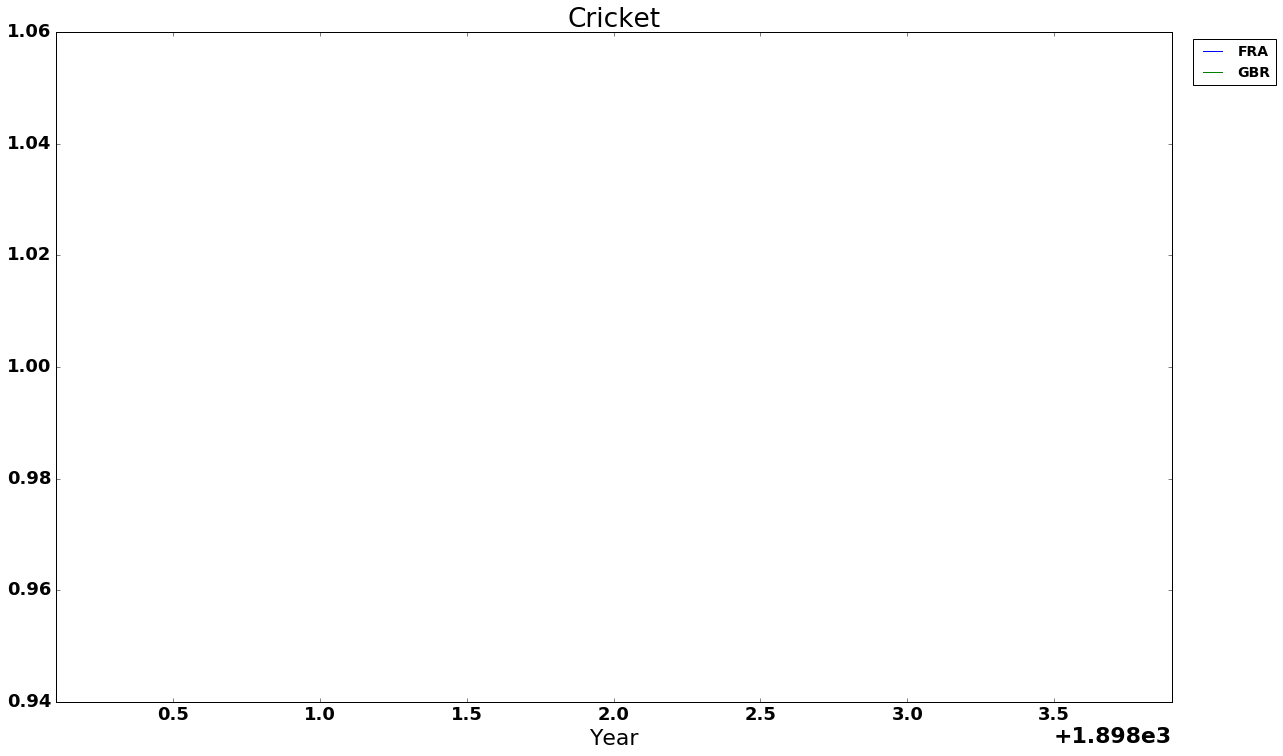

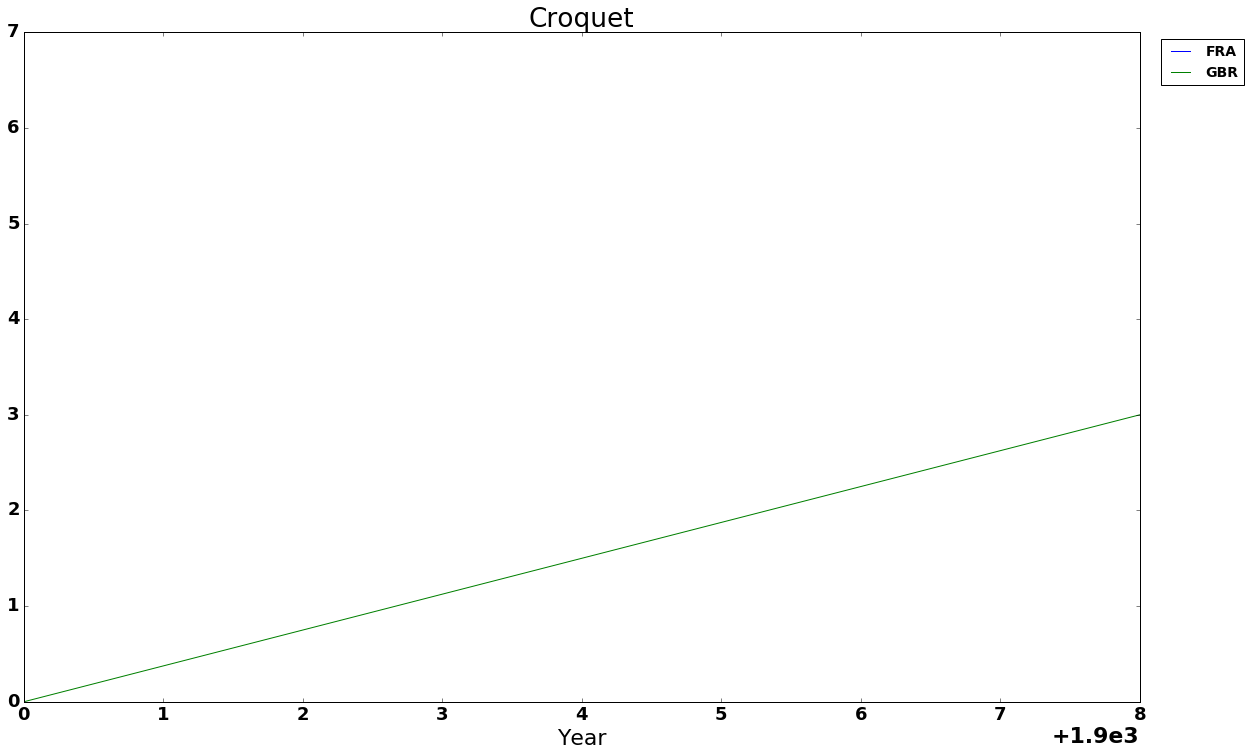

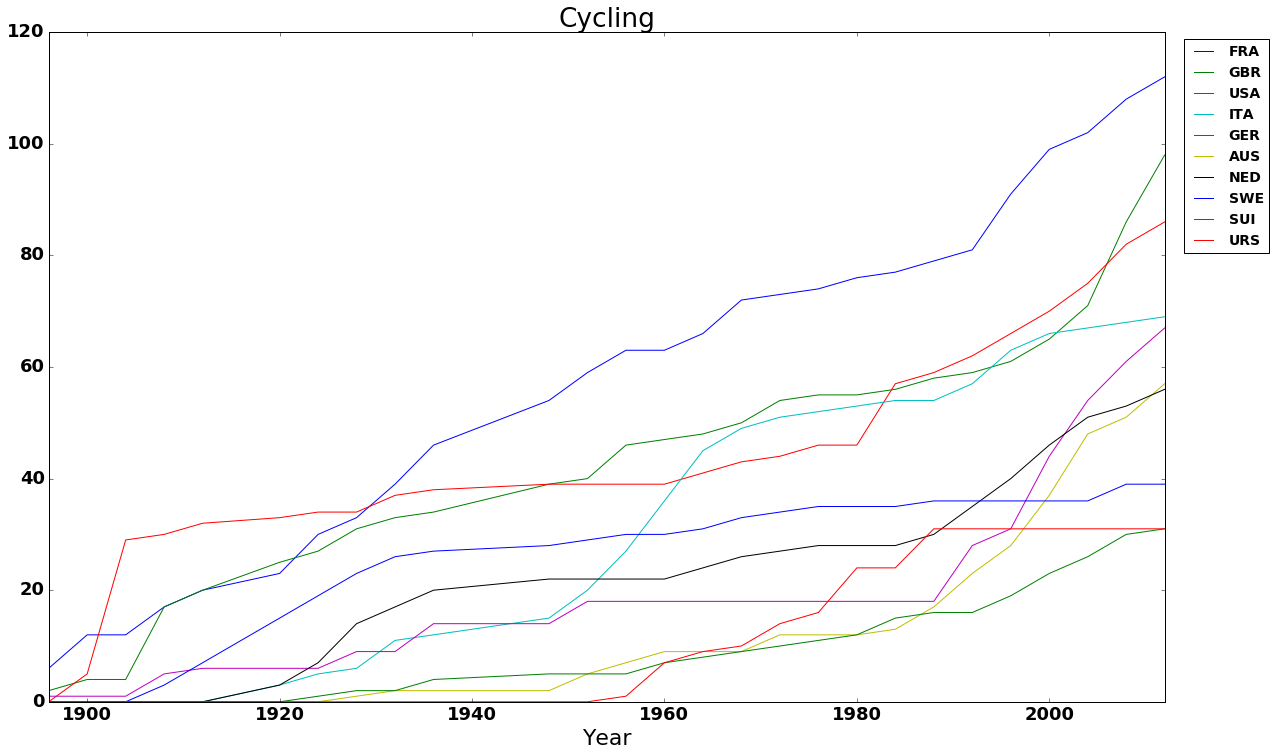

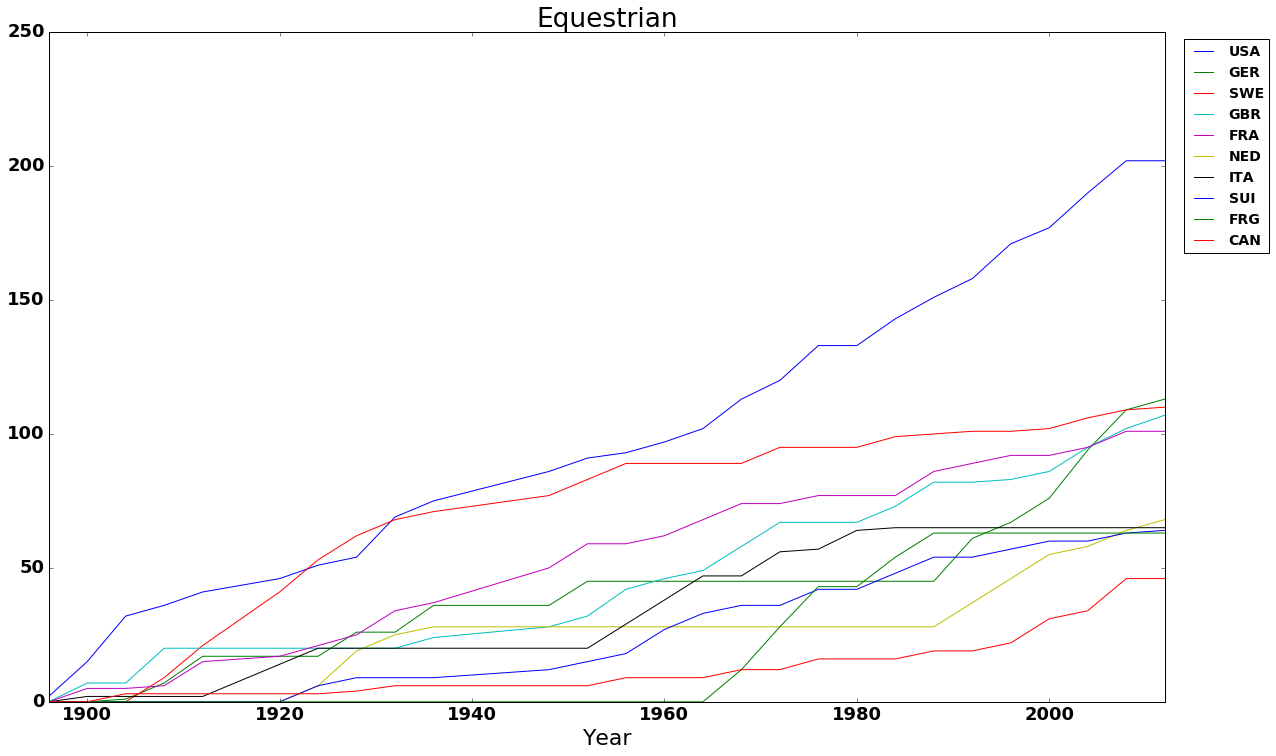

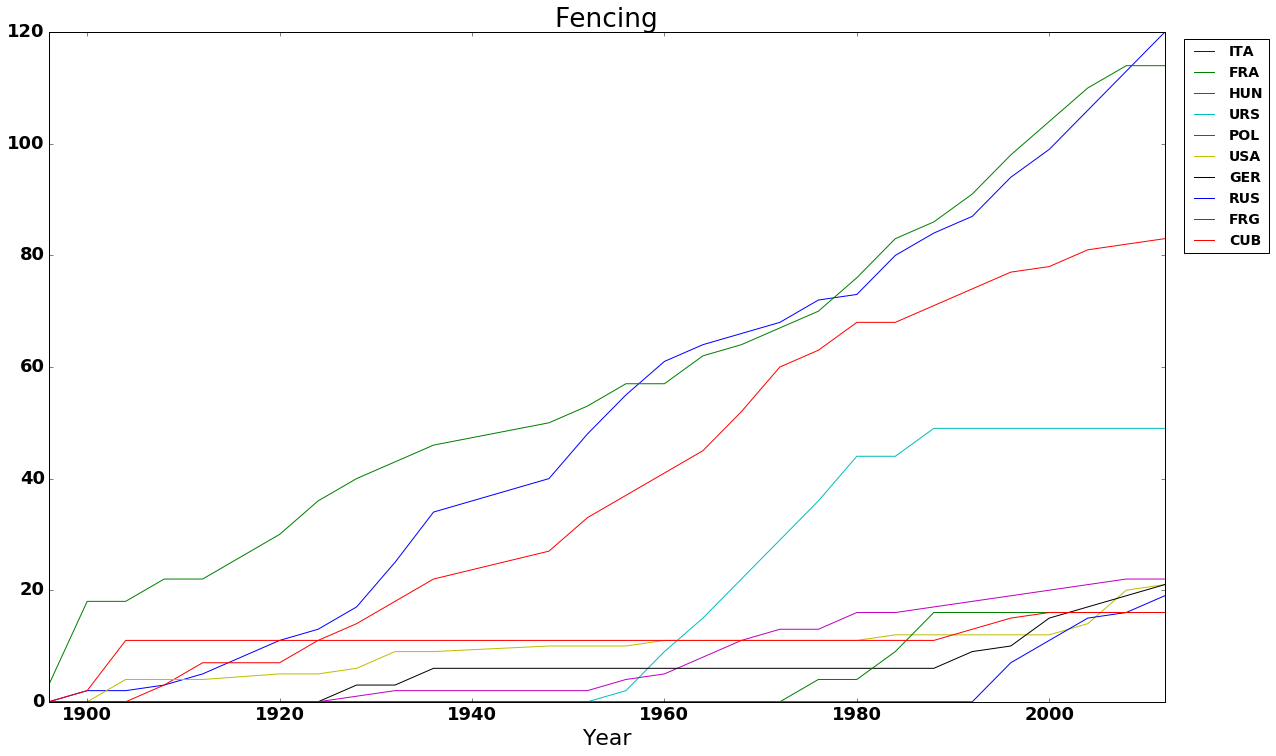

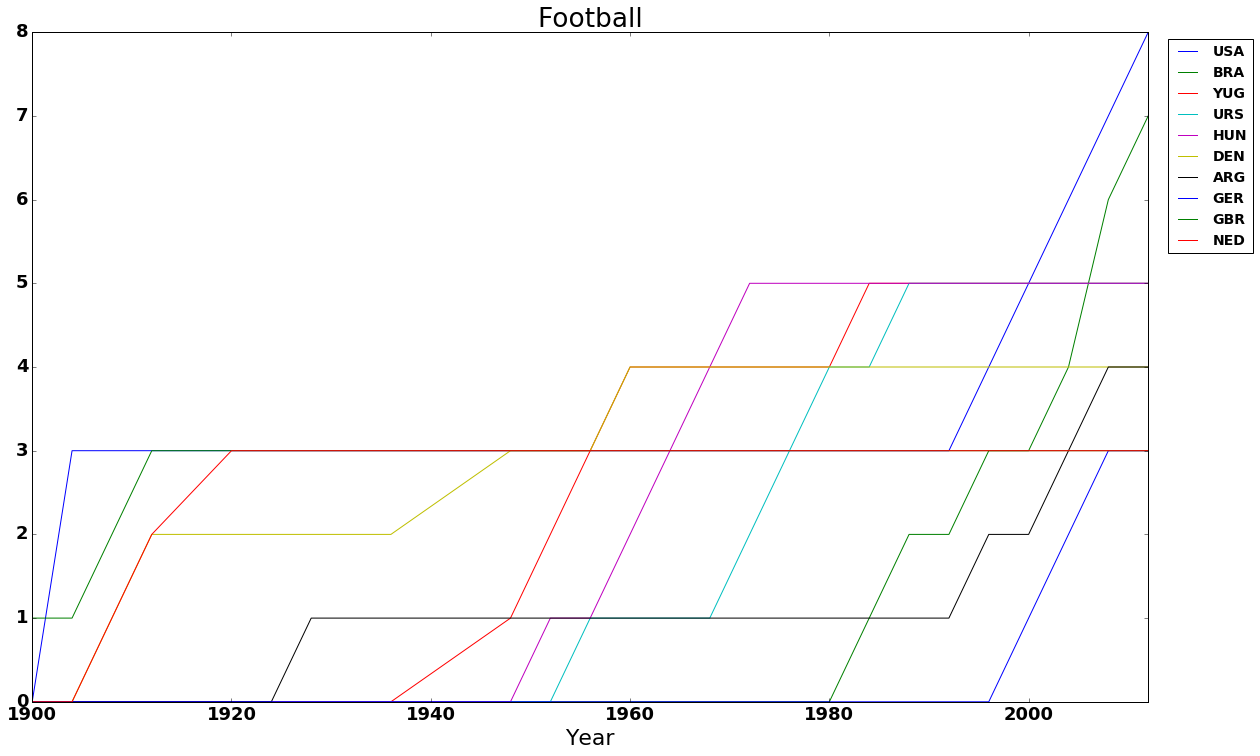

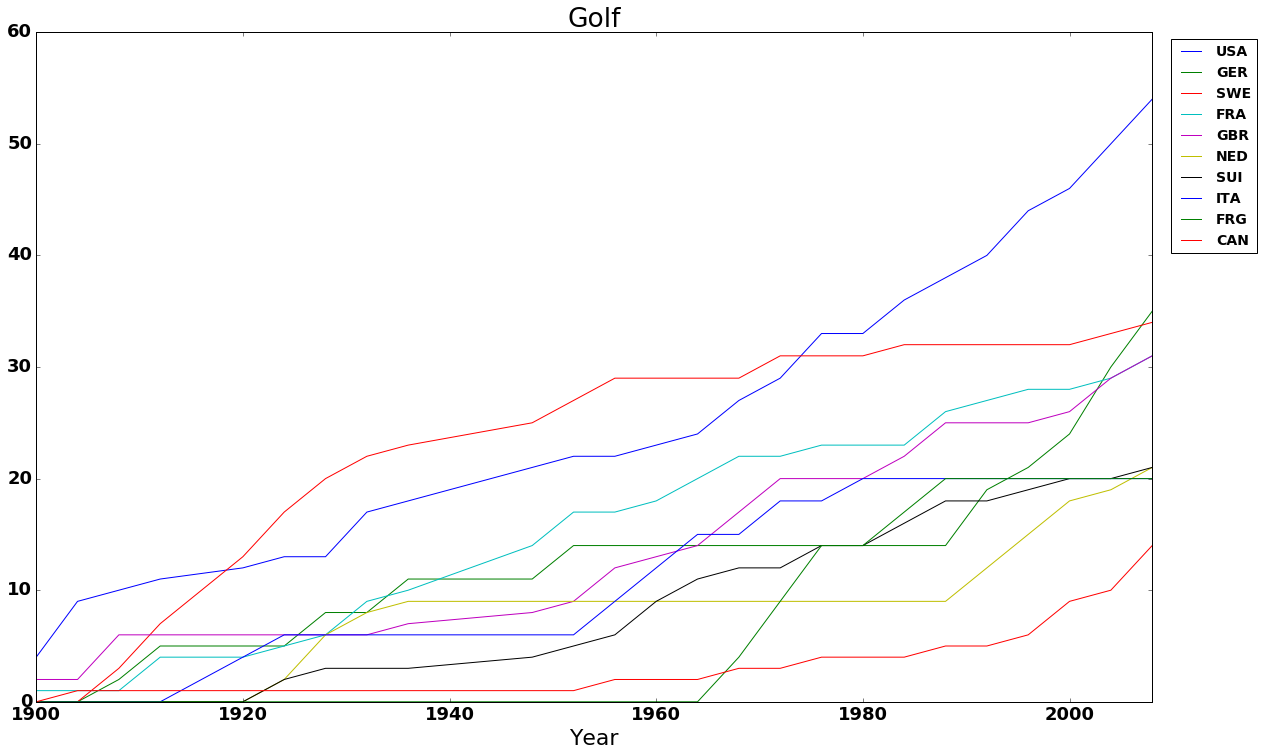

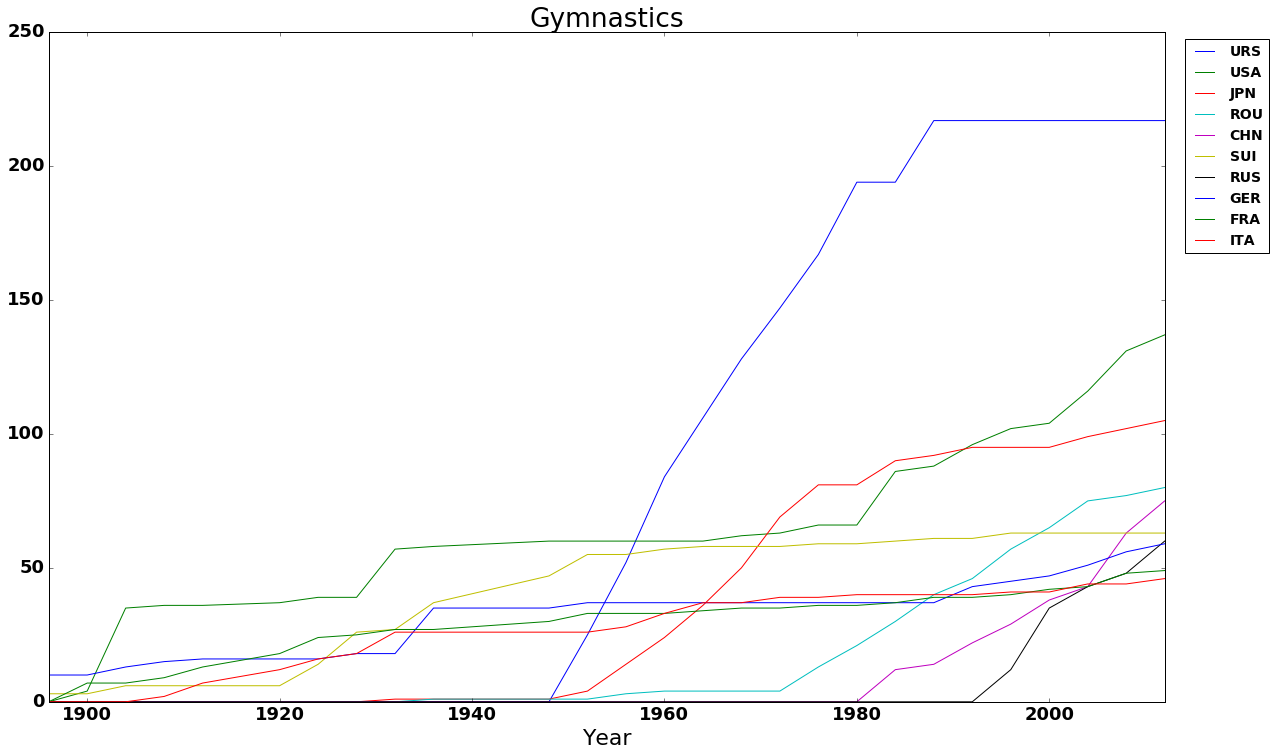

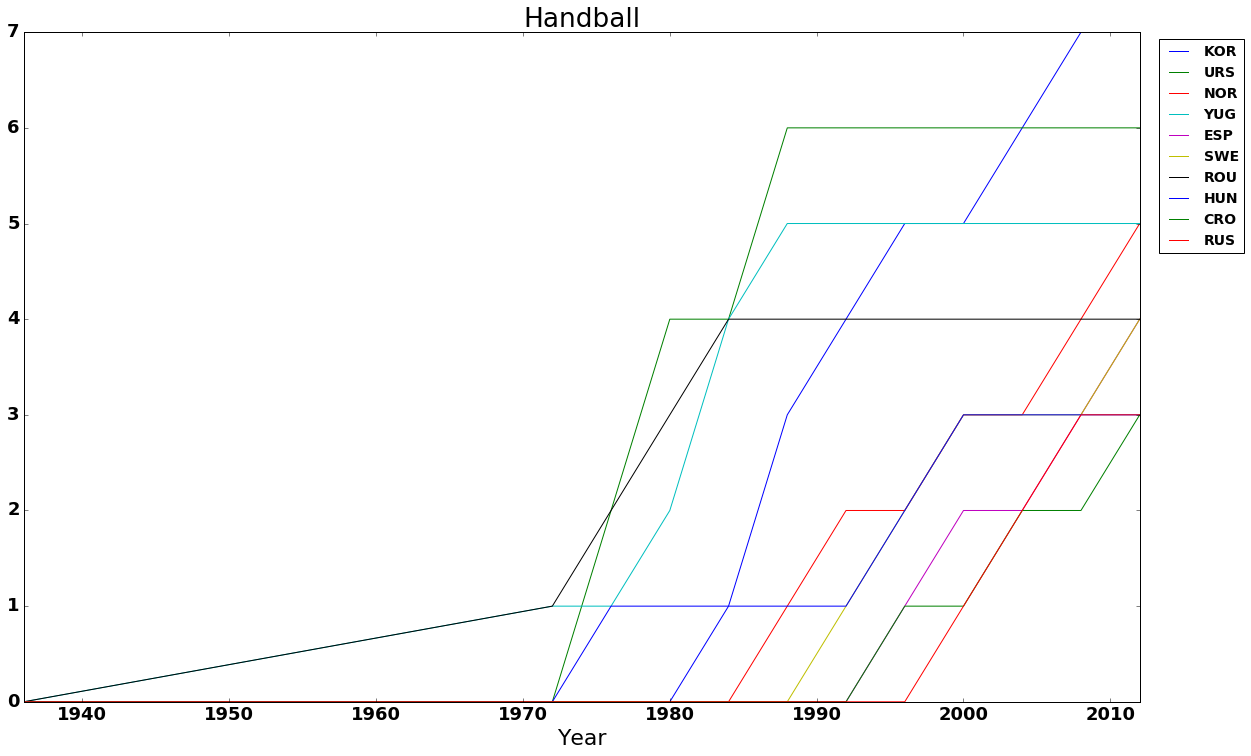

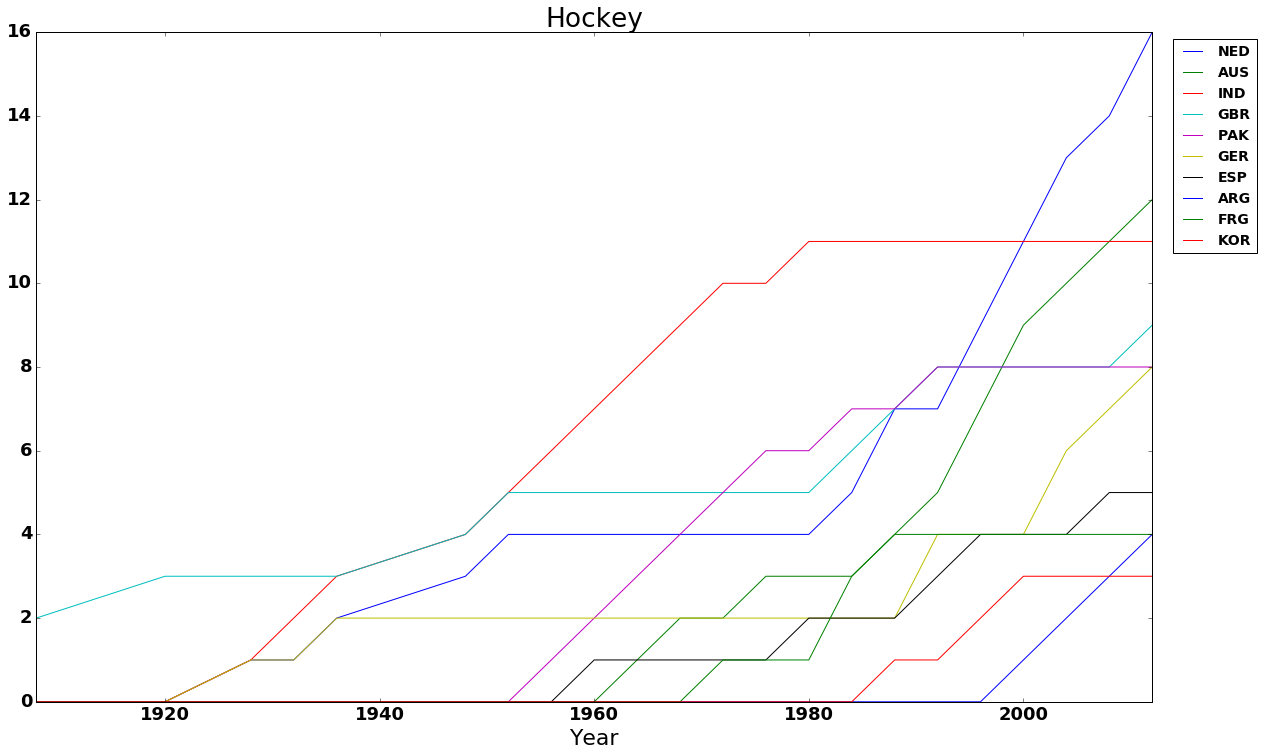

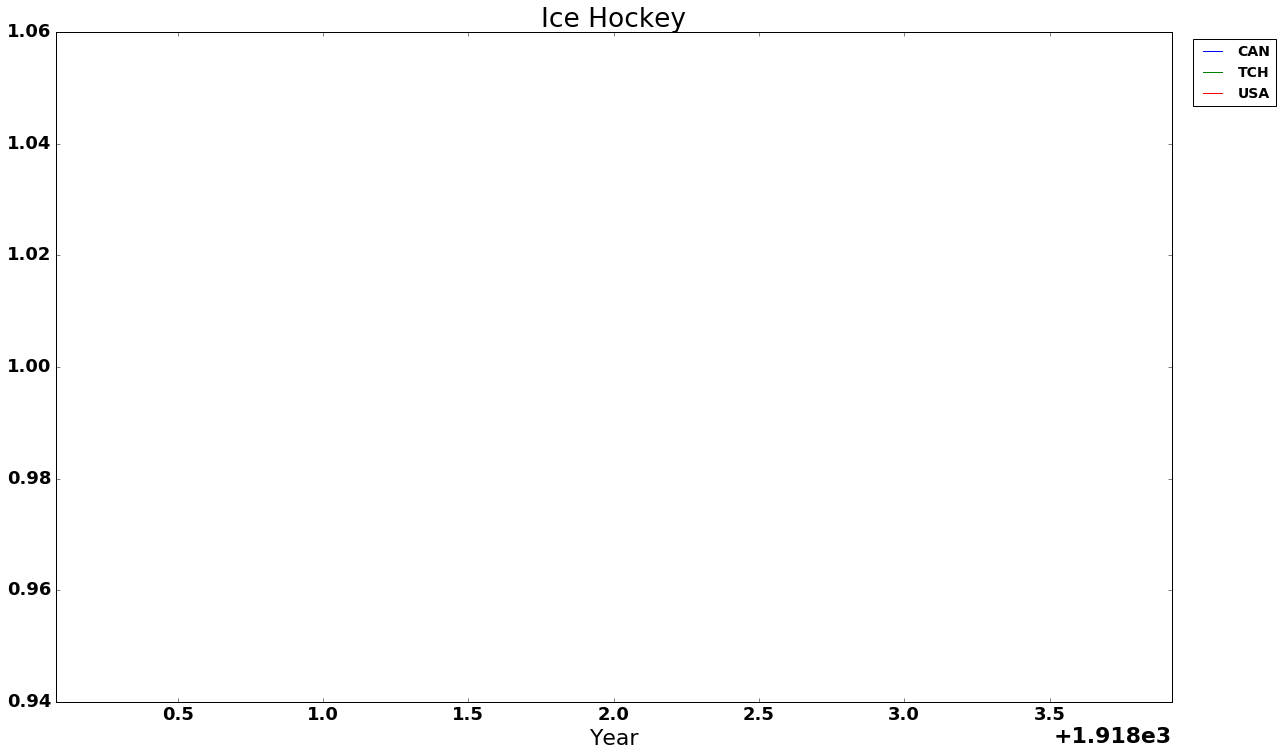

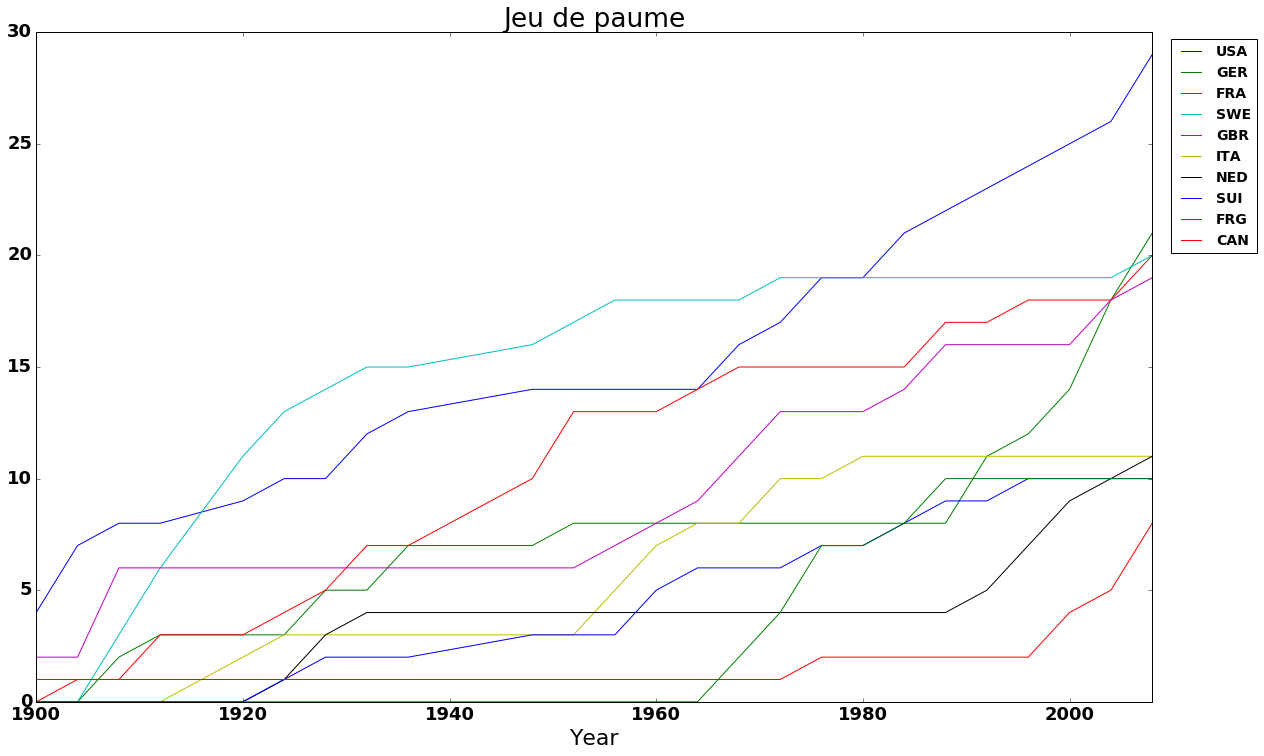

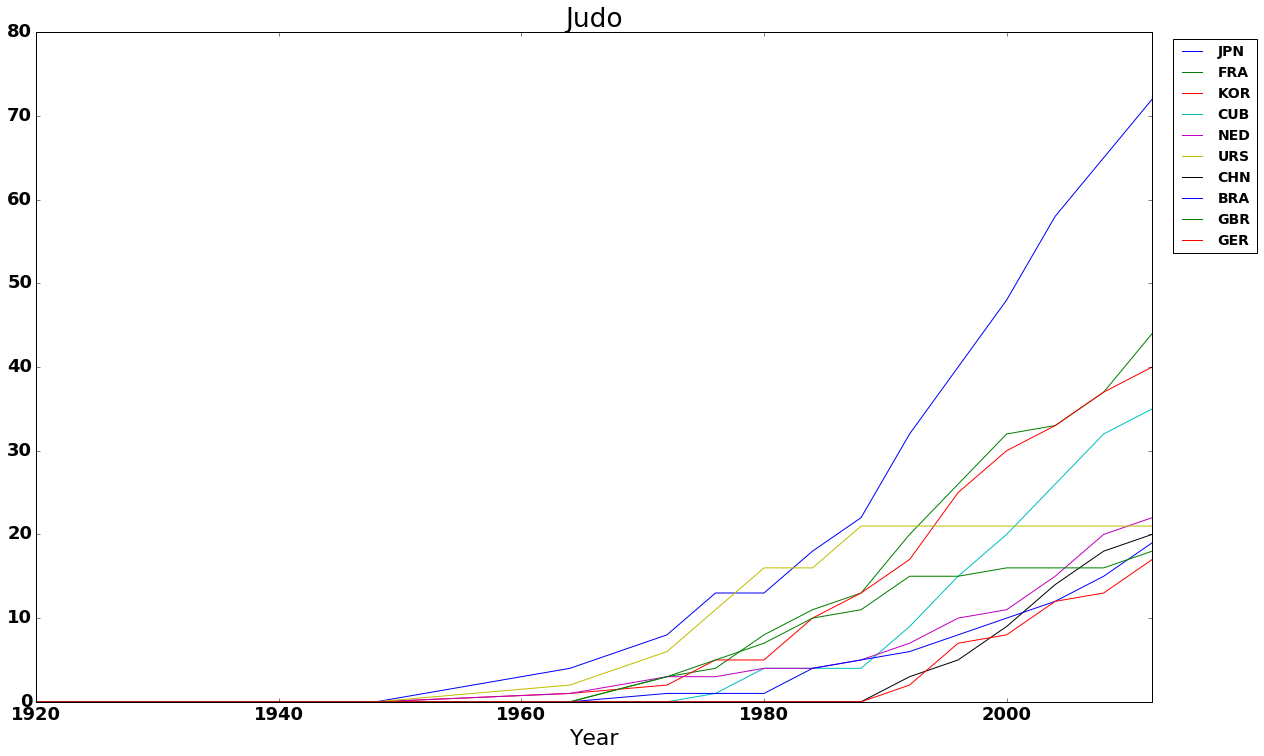

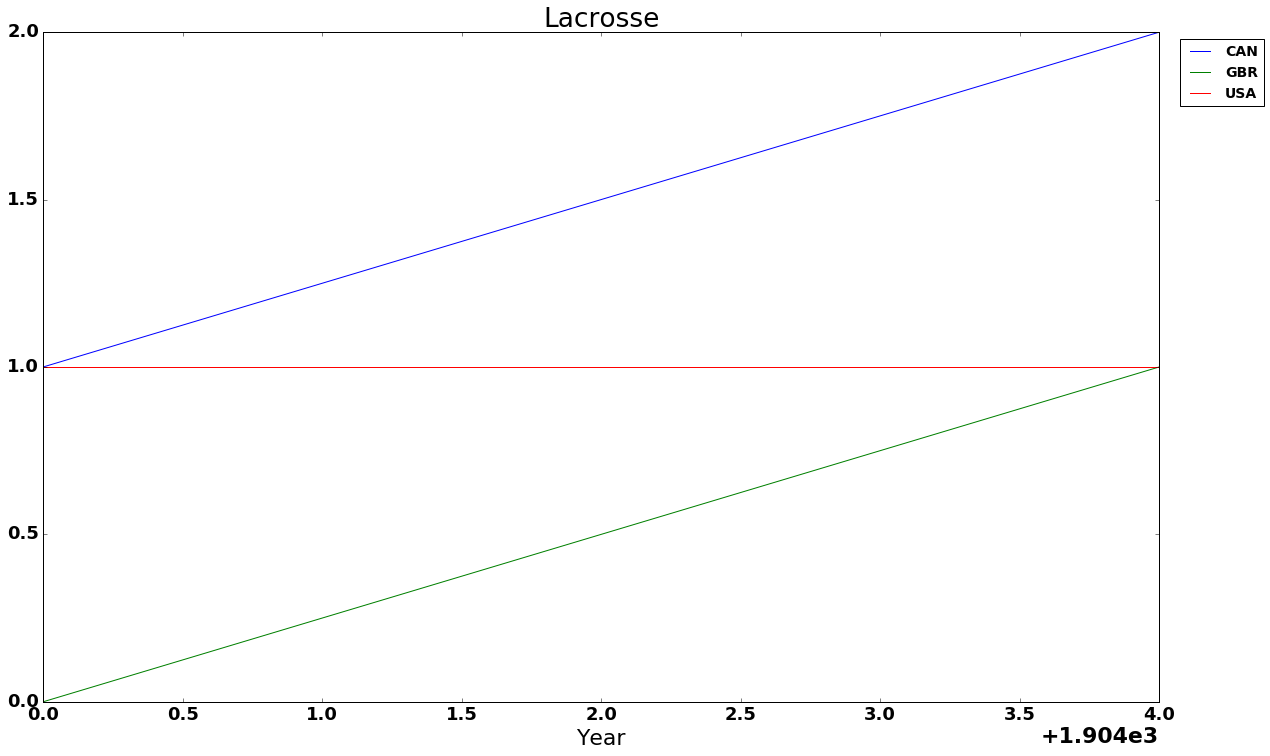

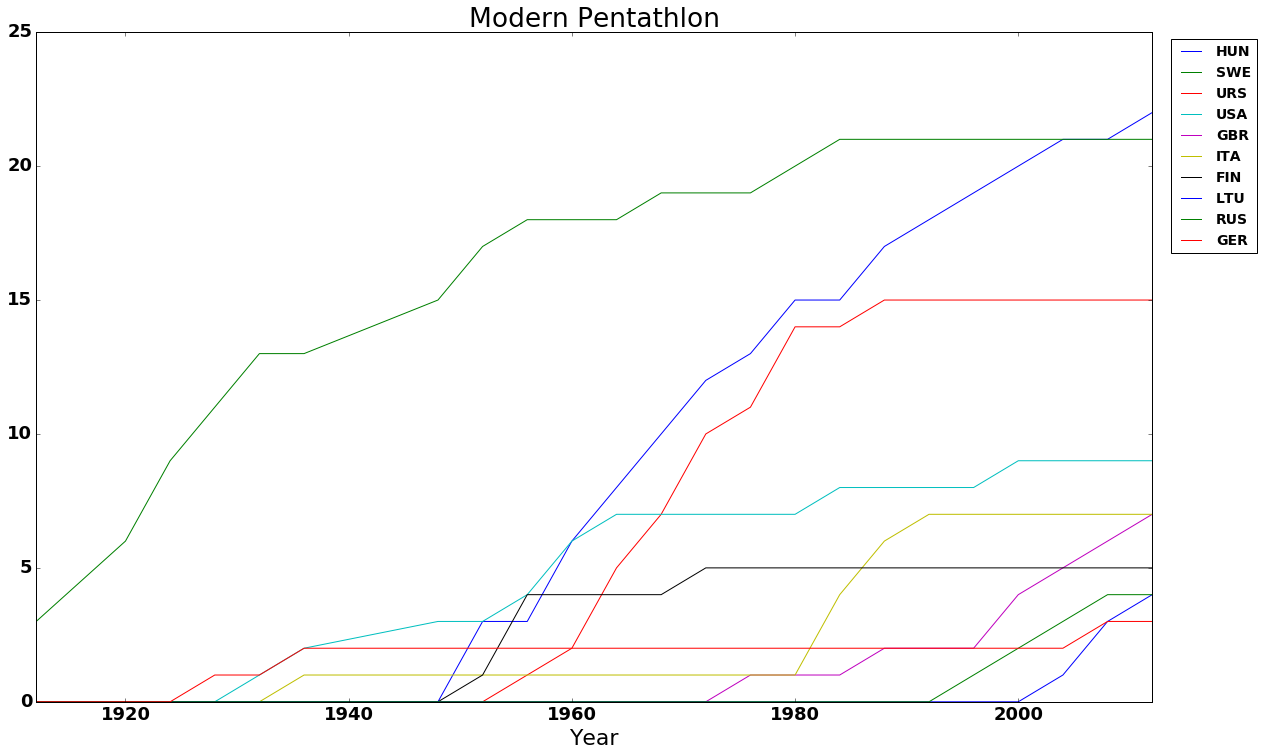

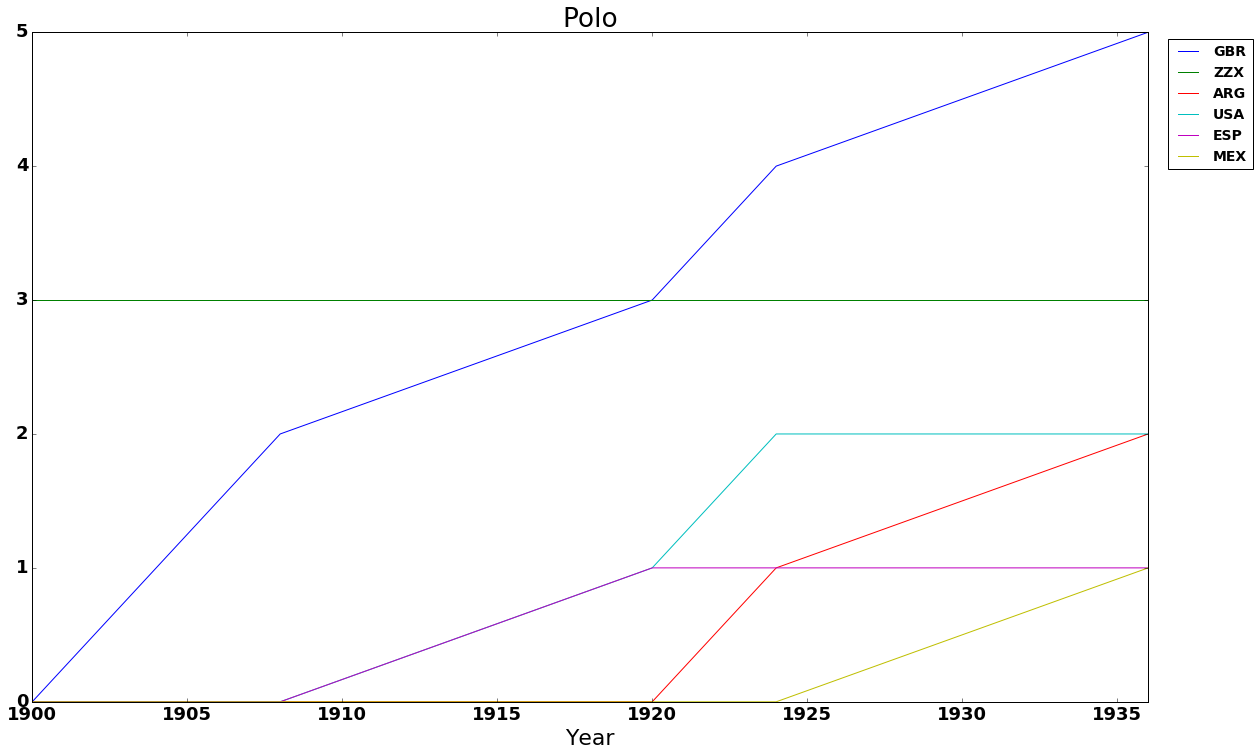

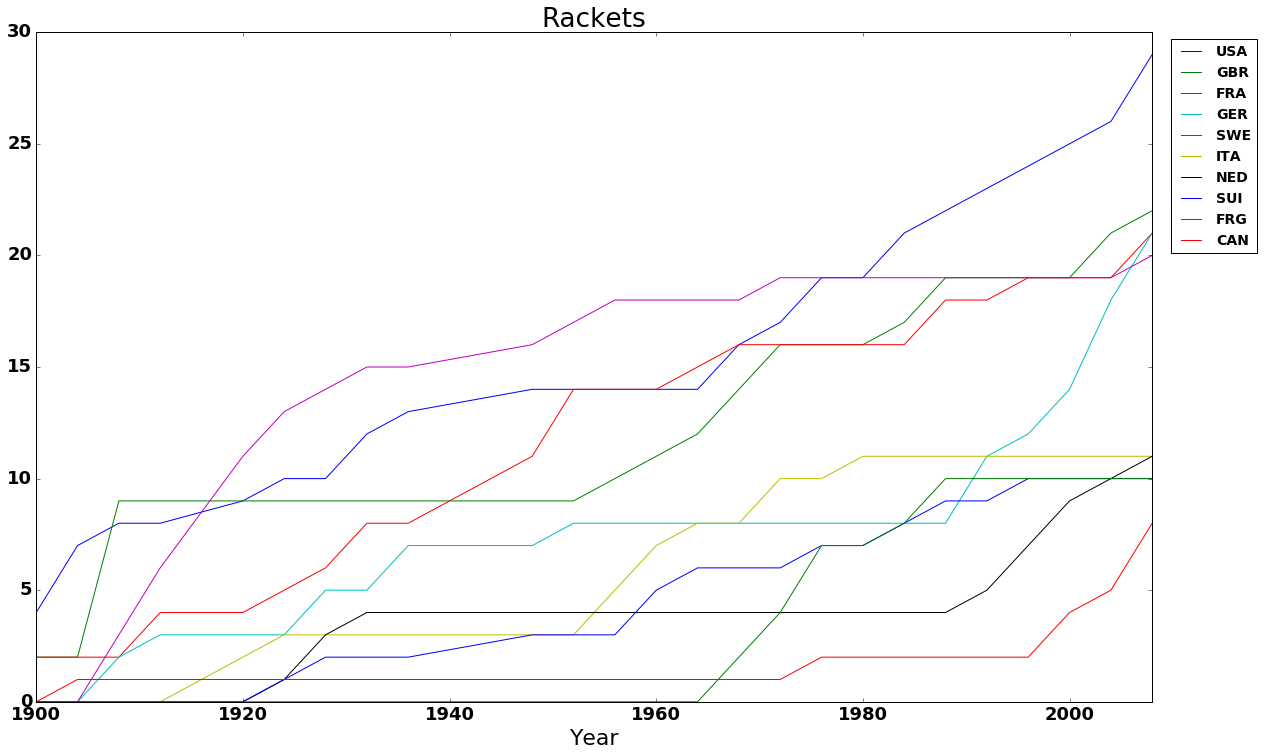

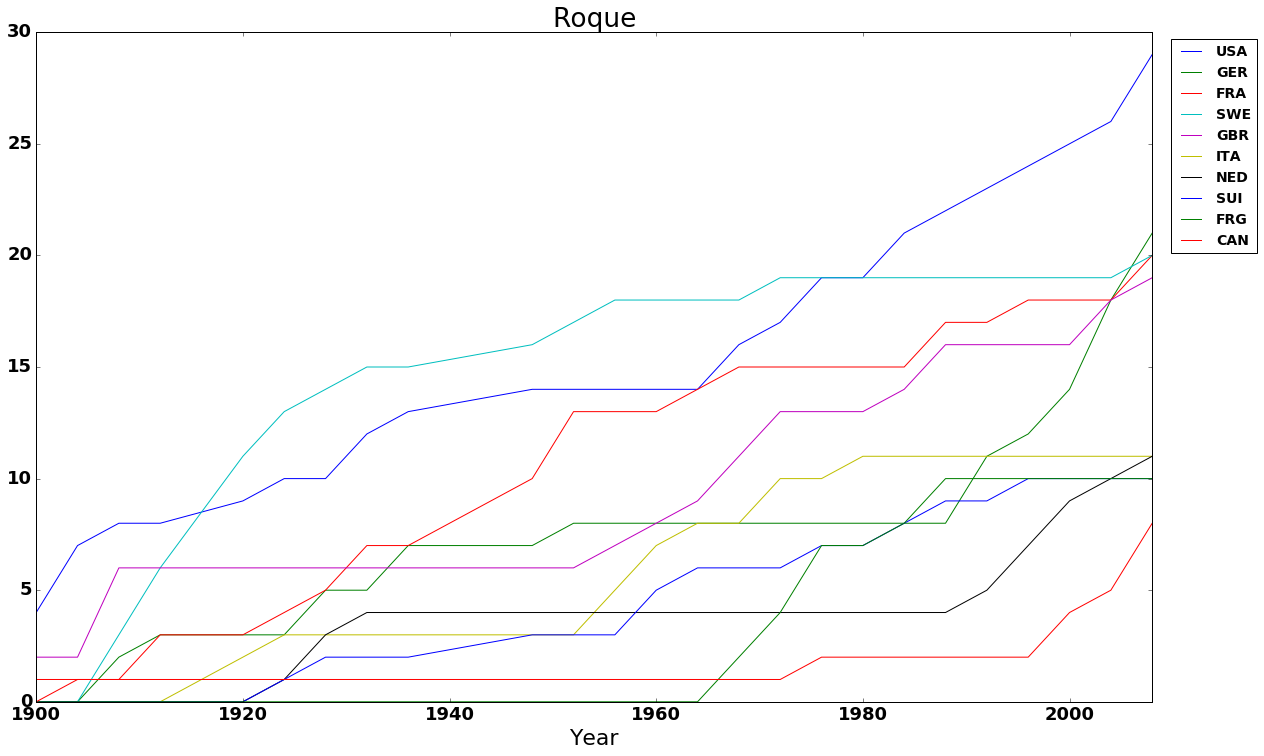

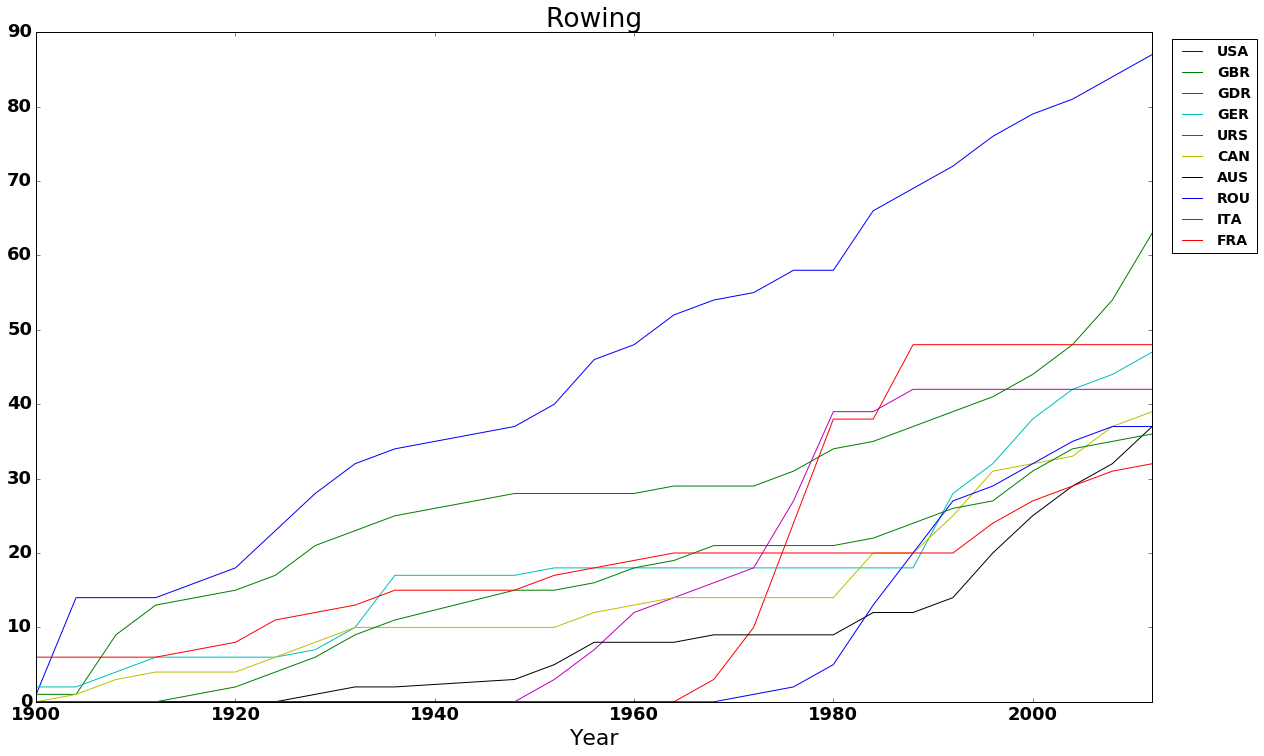

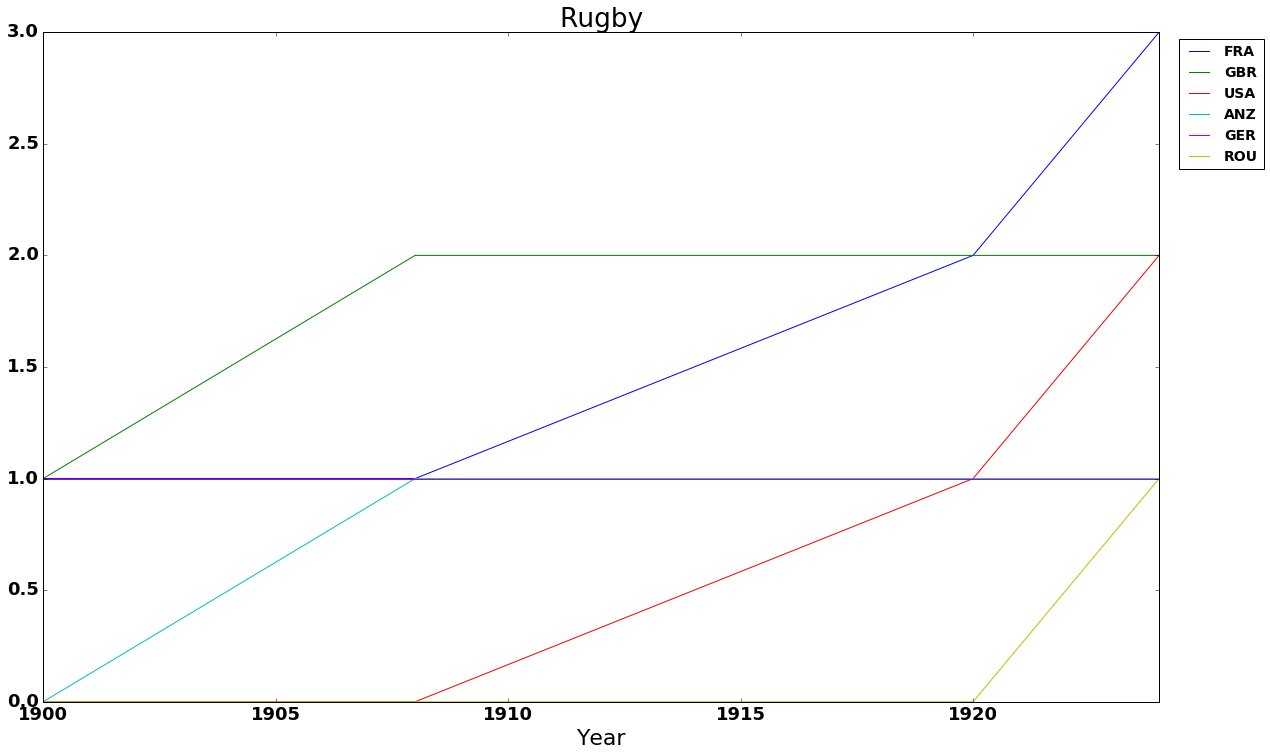

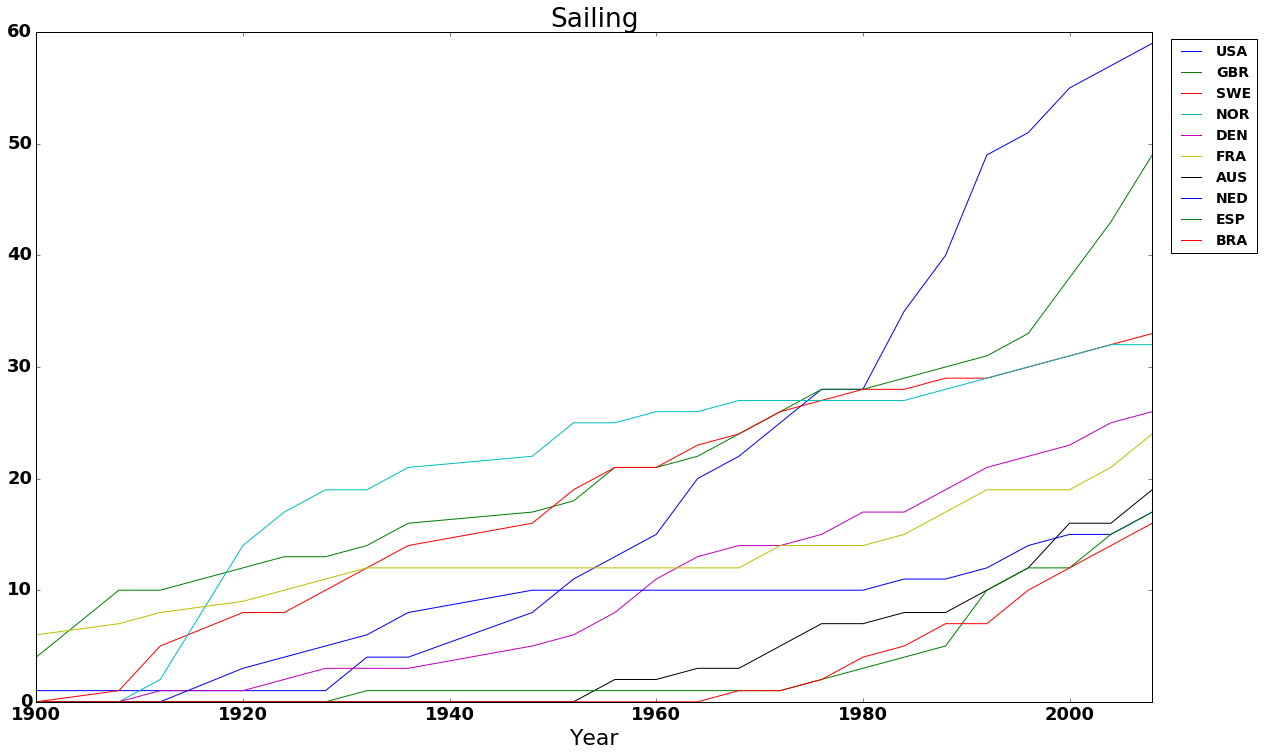

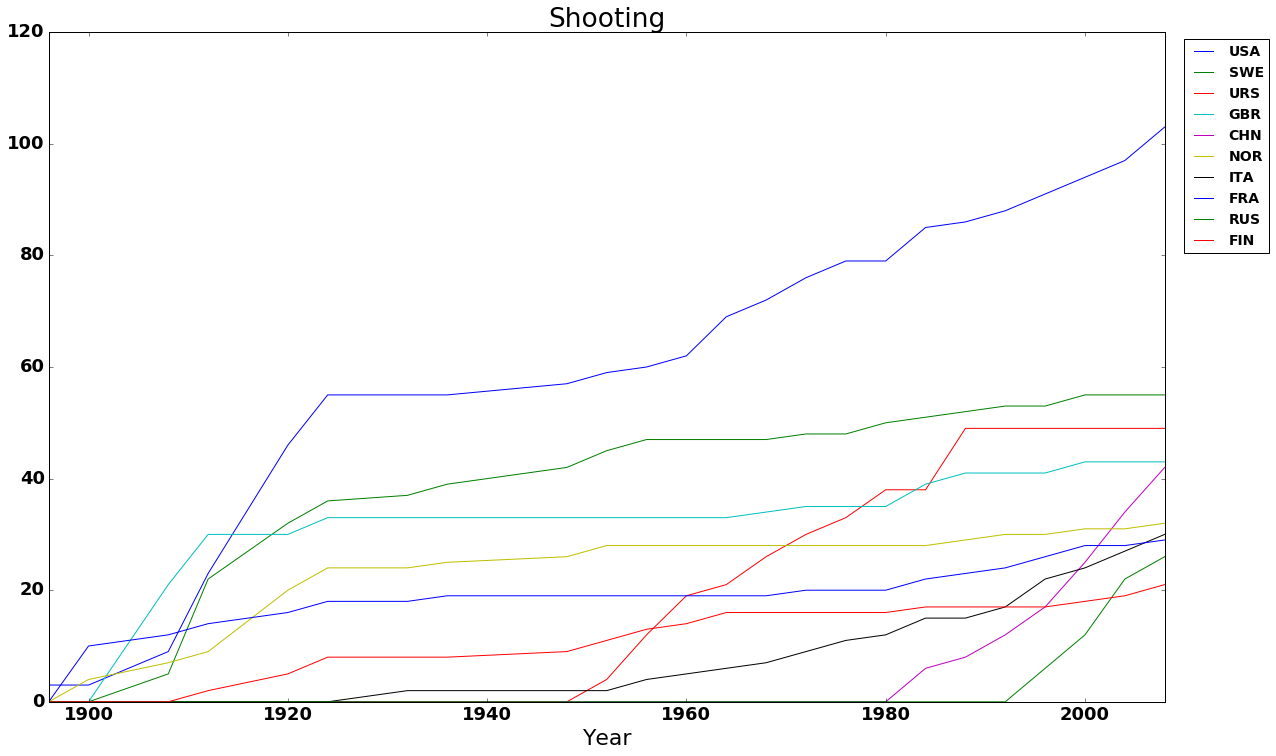

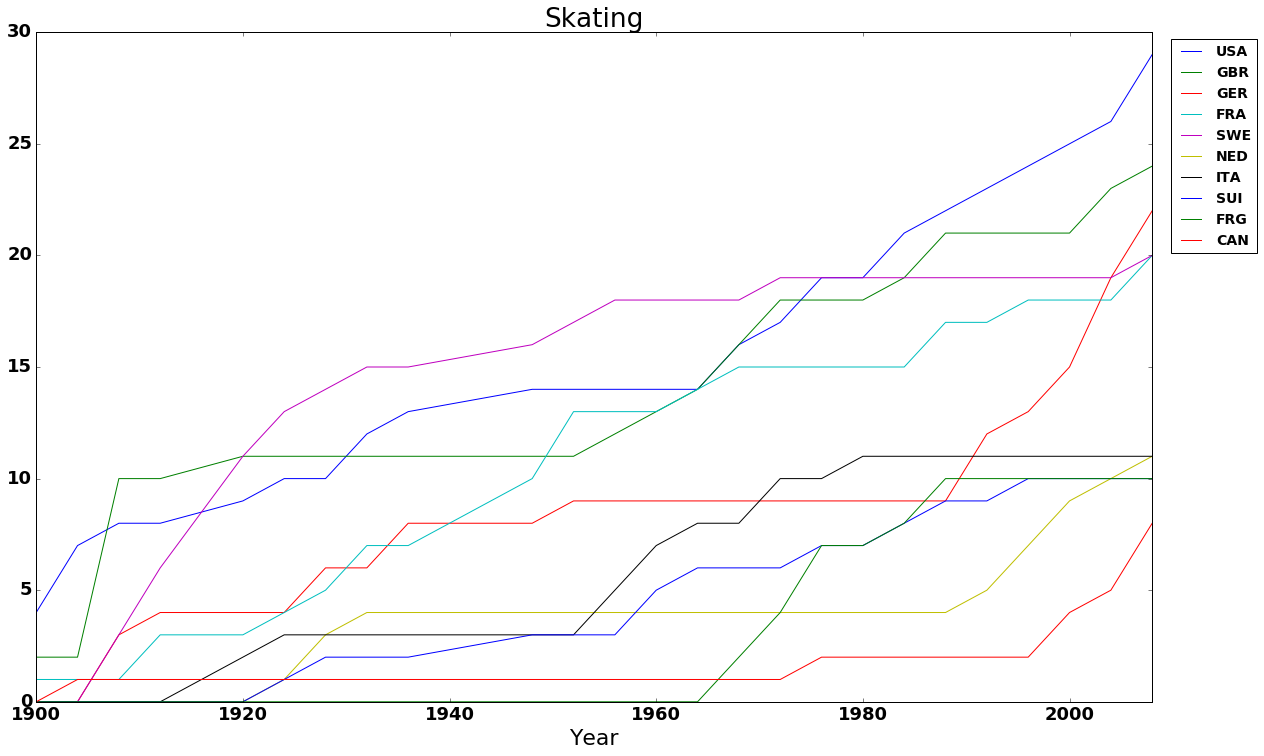

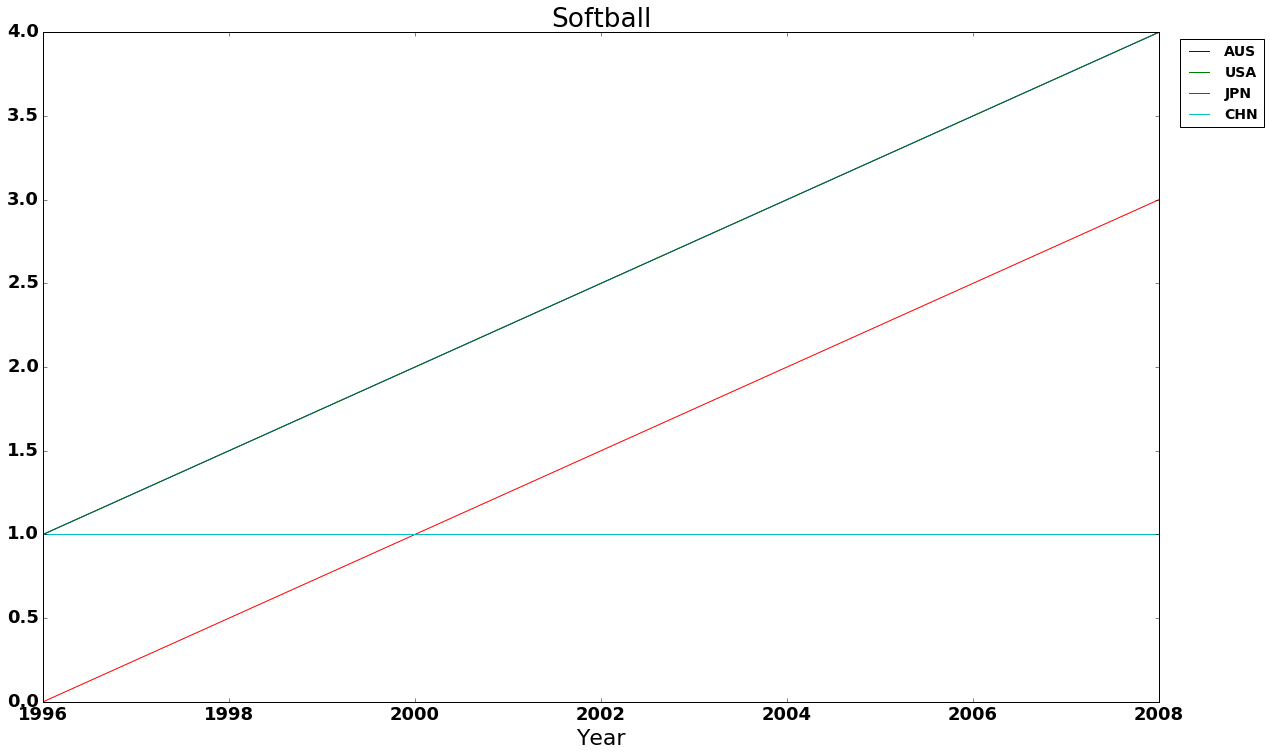

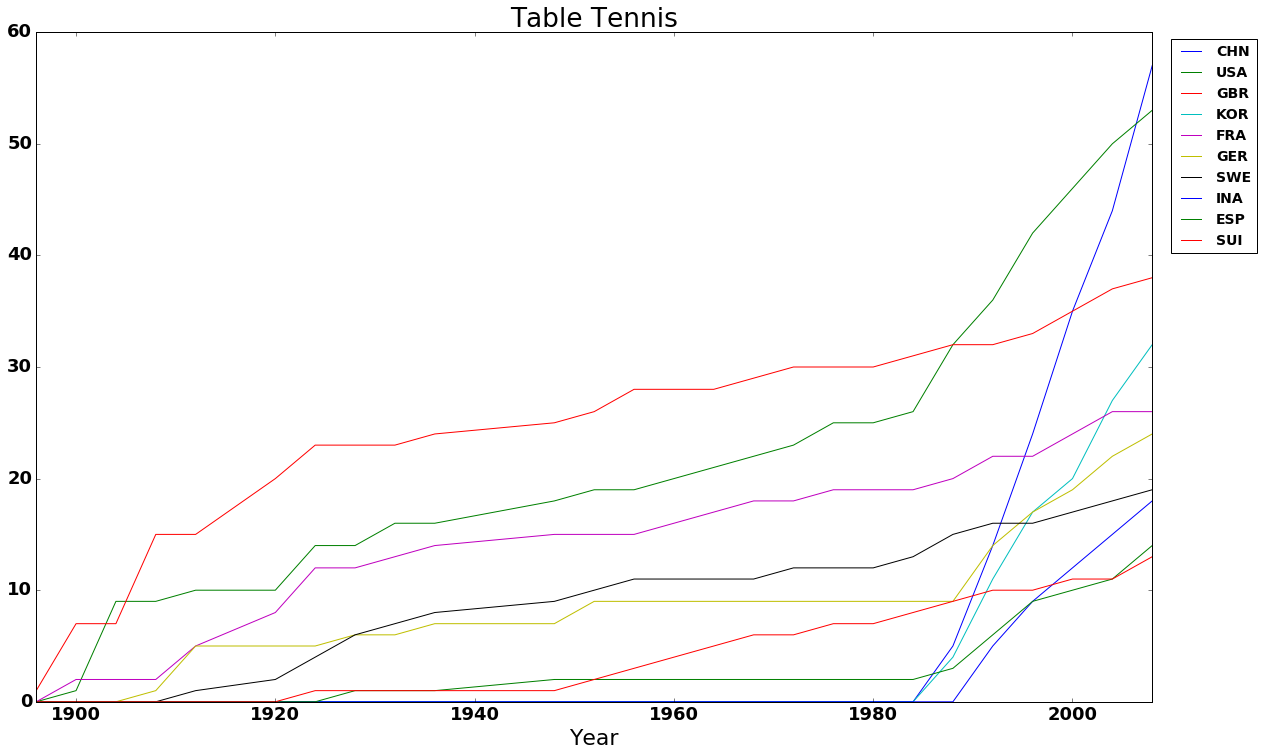

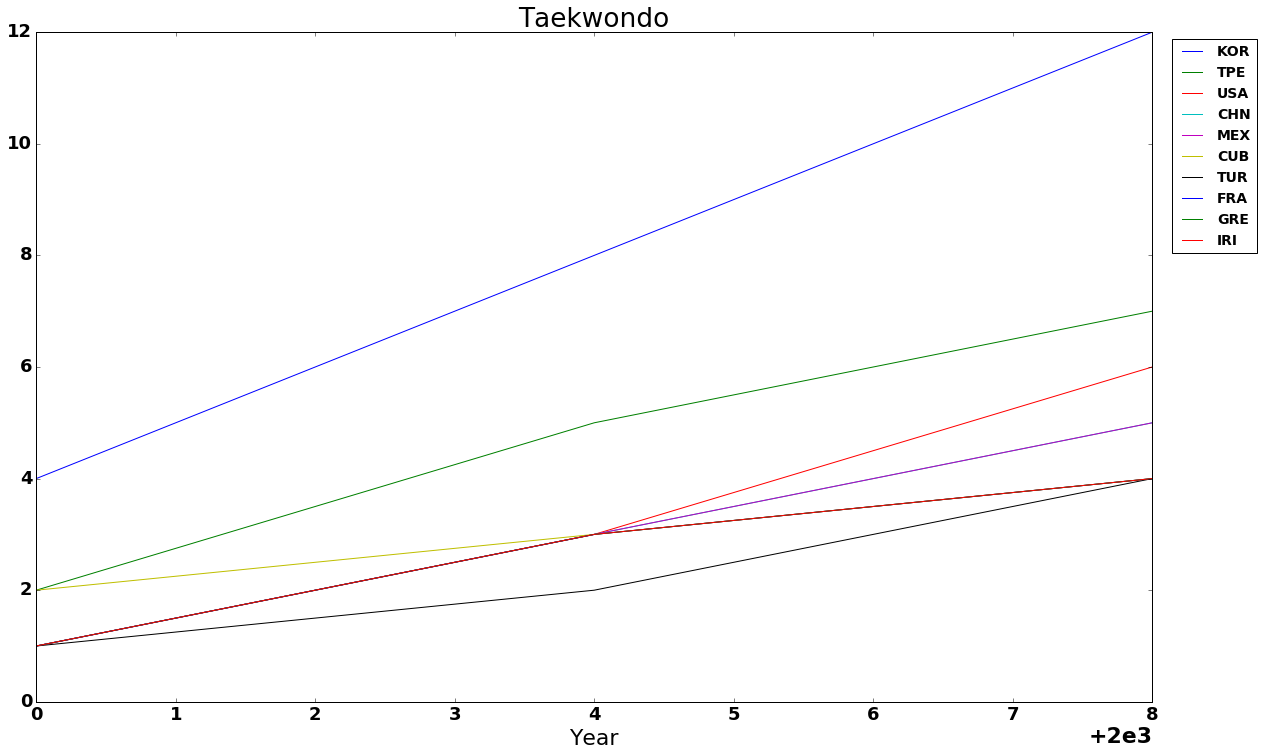

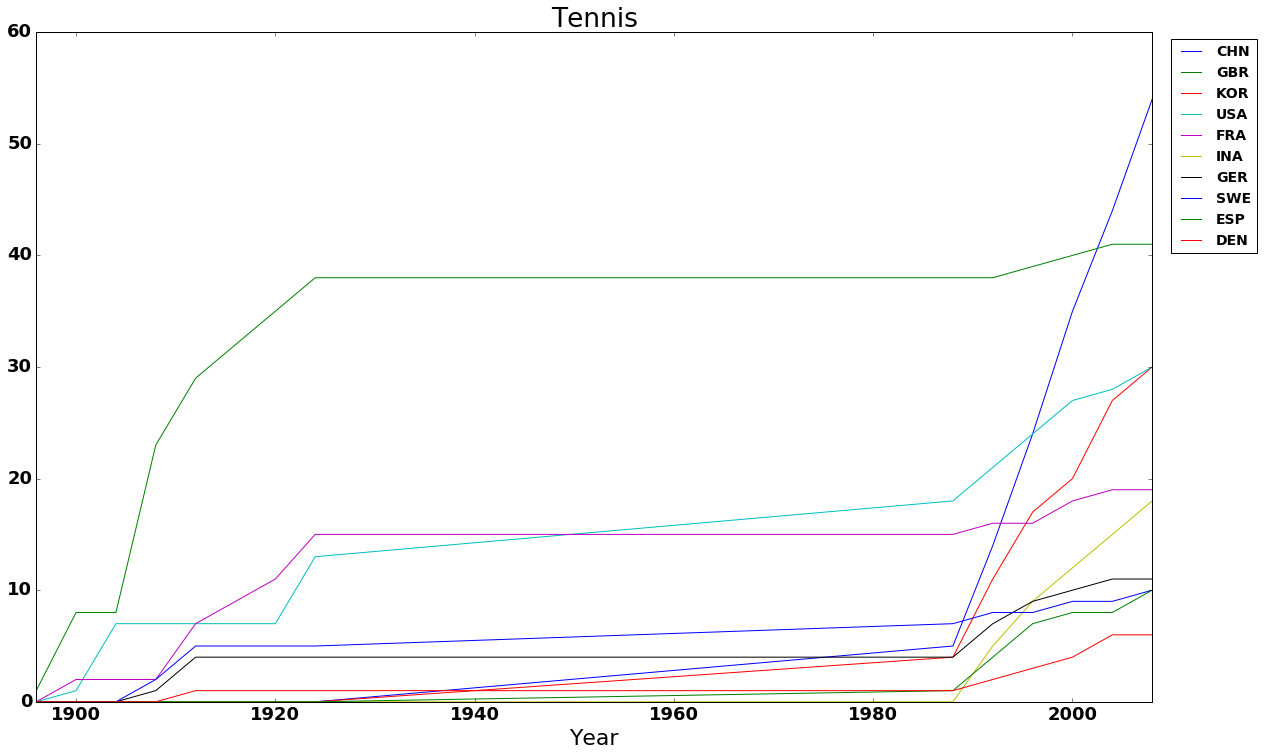

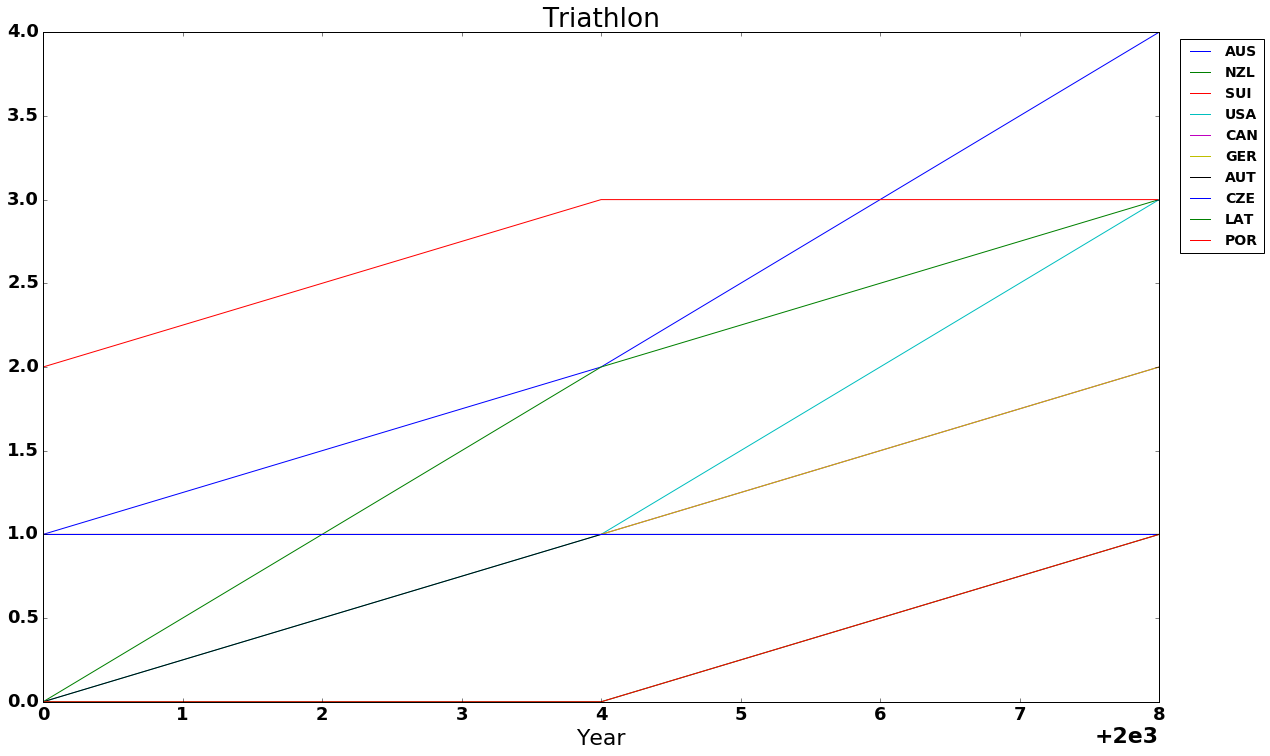

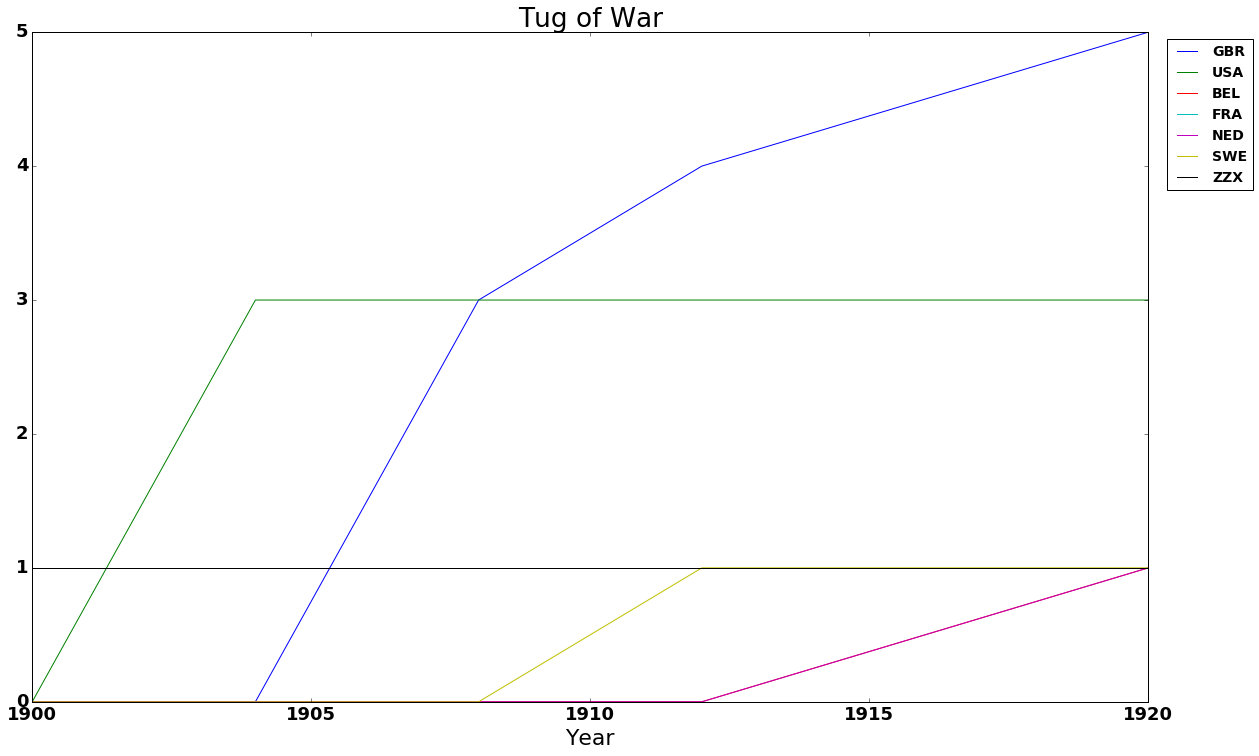

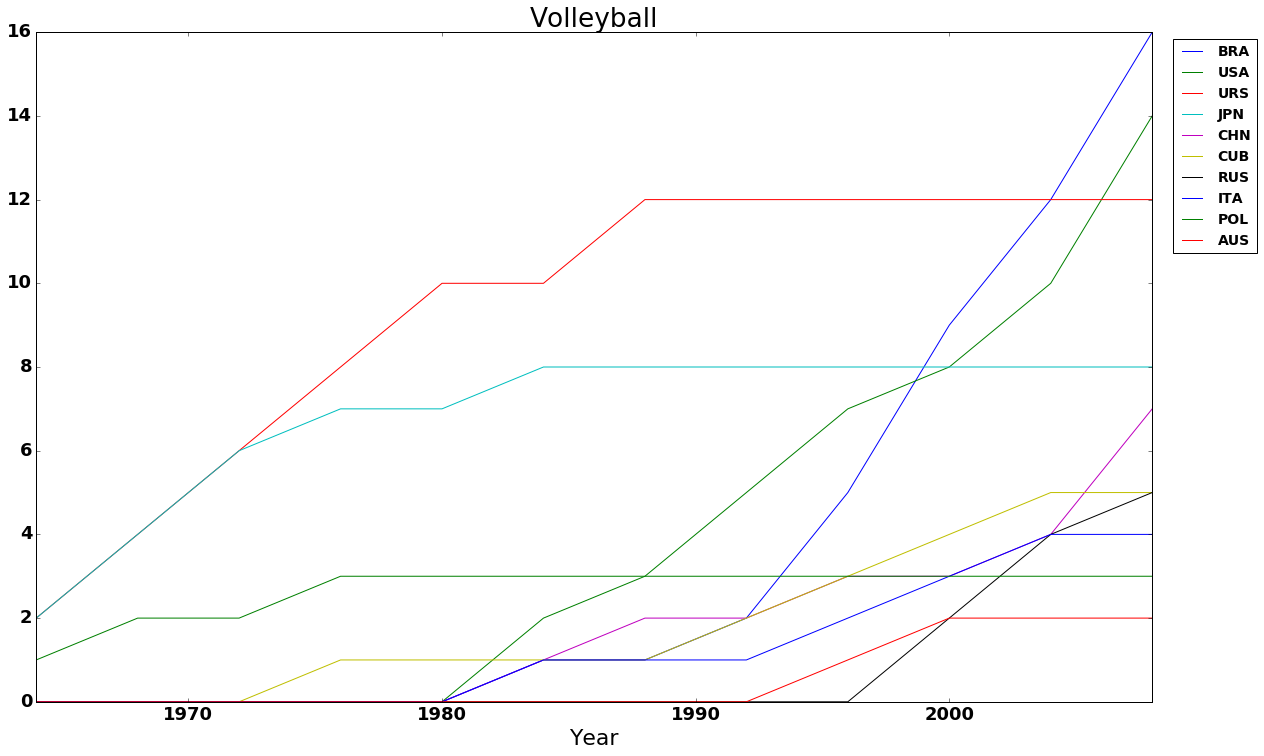

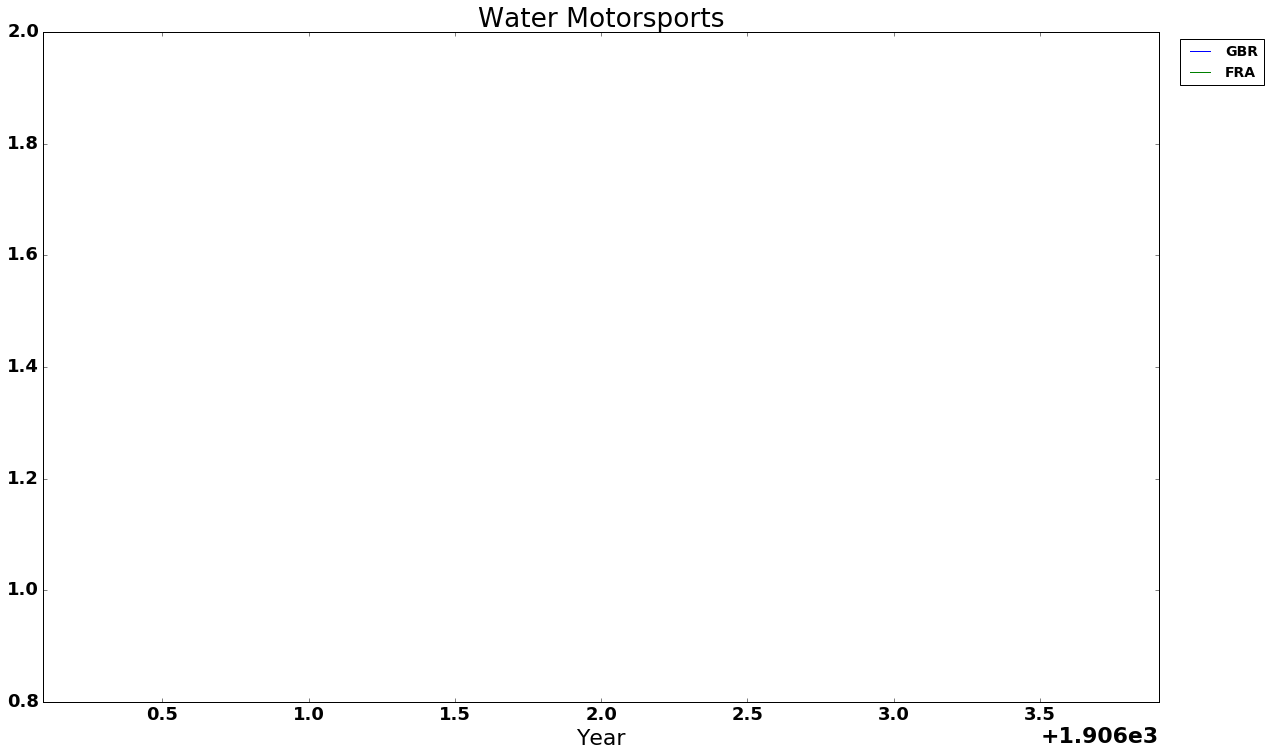

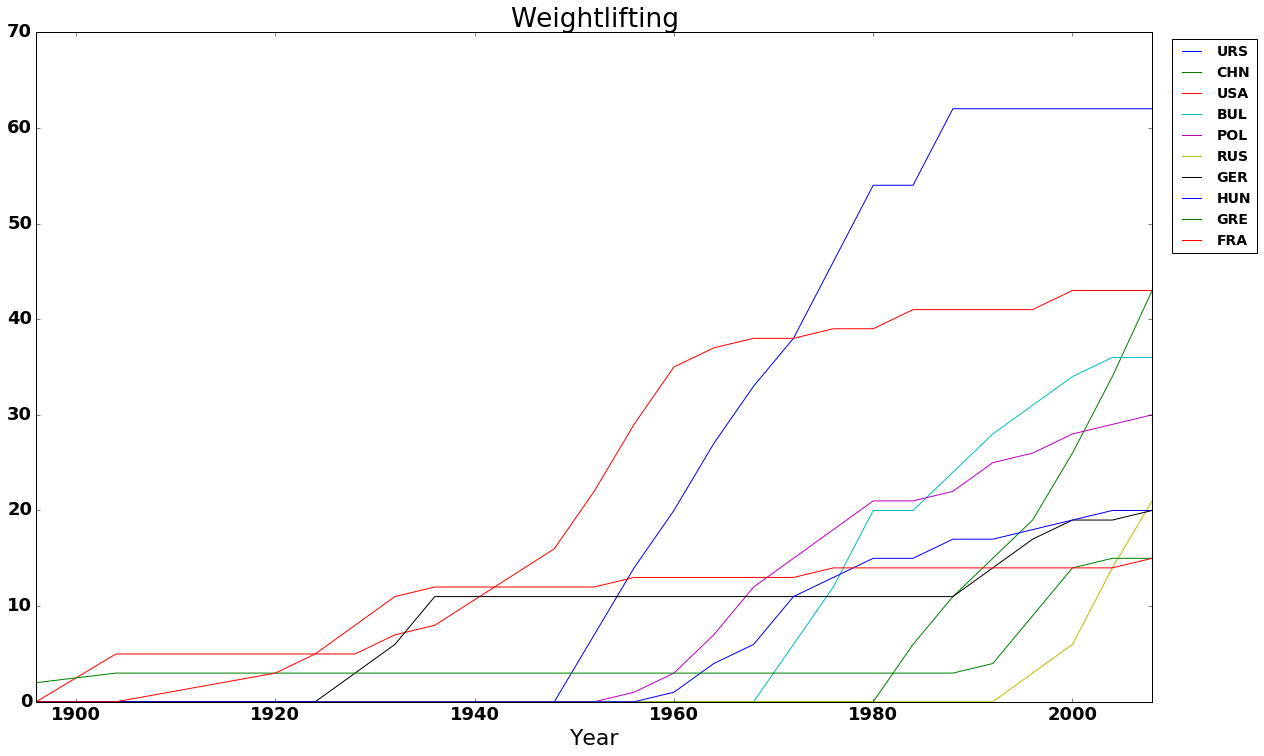

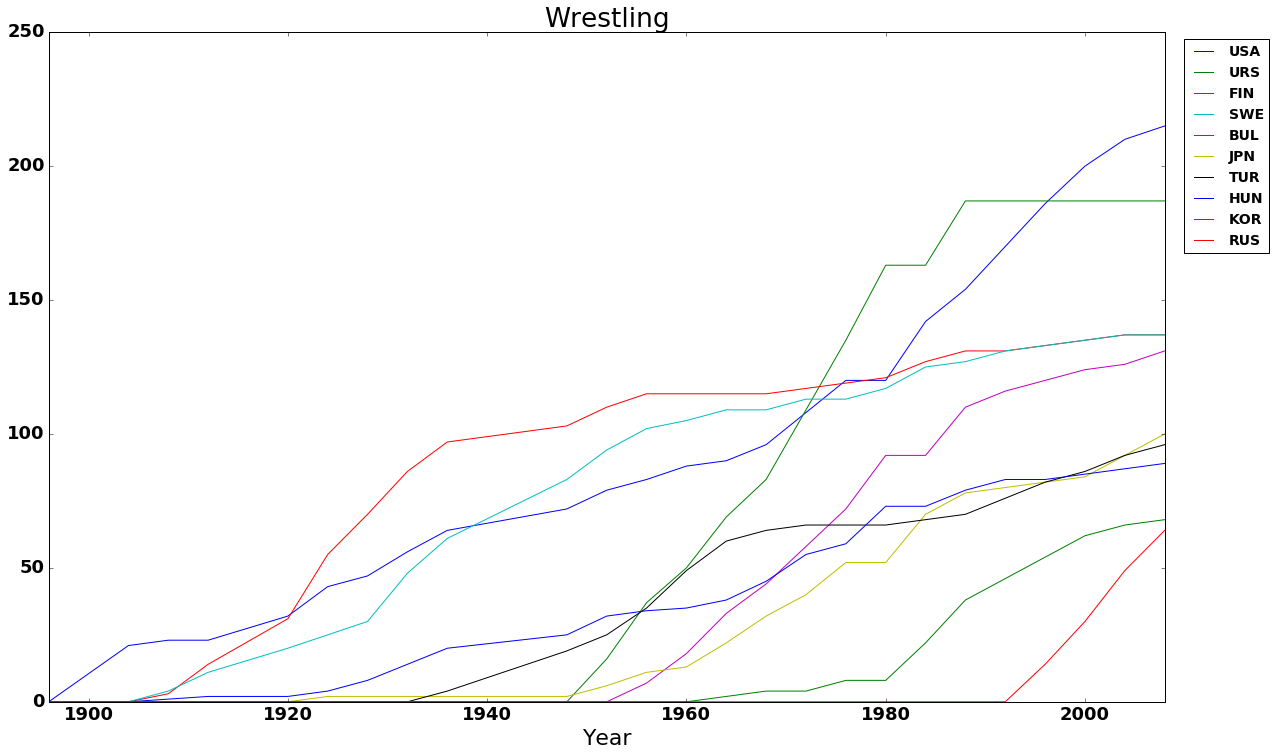

In [30]:
fig, axs = plt.subplots(1,sports_count)

sports = data.groupby(['Sport'])

for sport in sports:
    # sport_df = data[data['Sport'] == 'Weightlifting']
    sport_name = sport[0]
    sport_df = sport[1]

    # if sport_name != 'Weightlifting':
    #     continue

    # the medals in this list will be counted
    # normally only ['Gold'] or ['Gold, 'Silver', 'Bronze'] will be considered
    medal_to_include = ['Gold', 'Silver', 'Bronze']
    medals_we_care = sport_df[sport_df['Medal'].map(lambda x: x in medal_to_include)]

    # build the pivot table
    table = medals_we_care.drop(['Discipline', 'Event', 'Event gender', 'Sport'], 1).pivot_table(index=['NOC'], columns=['Year'], aggfunc='count')
    table = table.fillna(0).reset_index()

    # remove the multi-level columns
    new_table = table['Medal']
    # set index for as it's country name
    new_table = new_table.set_index(table['NOC'])
    # print(new_table.columns)
    
    for i, year in enumerate(new_table.columns):
        # we add a col to the next column in each loop,
        # to make a cumulative chart
        if i == (len(new_table.columns) - 1):
            continue

        next_year = new_table.columns[i+1]
        if next_year == 'NOC':
            continue

        new_table[next_year] = new_table[year] + new_table[next_year]

    new_table = new_table.sort_values(new_table.columns[-1], ascending=False)
    topten = new_table.iloc[0:10, :]

    # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    topten.T.plot.line(figsize=(20,12), fontsize=18, title=sport_name).legend(bbox_to_anchor=(1.10, 1.0), fontsize=14)

<h1>Aquatics</h1>
There seems to be some missing data. Check each of the sports in different section.

In [31]:
# Take a look at how each top country did
data[data['Sport'] == 'Aquatics'].groupby(['NOC']).count().sort_values(['Medal'], ascending=False).head()

,Discipline,Event,Event gender,Medal,Sport,Year
NOC,,,,,,
USA,694,694,694,694,694,694
AUS,200,200,200,200,200,200
CHN,101,101,101,101,101,101
GDR,99,99,99,99,99,99
GER,98,98,98,98,98,98


In [32]:
set(data[(data['Sport'] == 'Aquatics') & (data['NOC'] == 'USA')]['Medal'])

{'Bronze', 'Gold', 'Silver'}

(243, 7)


/Users/wangchi-an/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


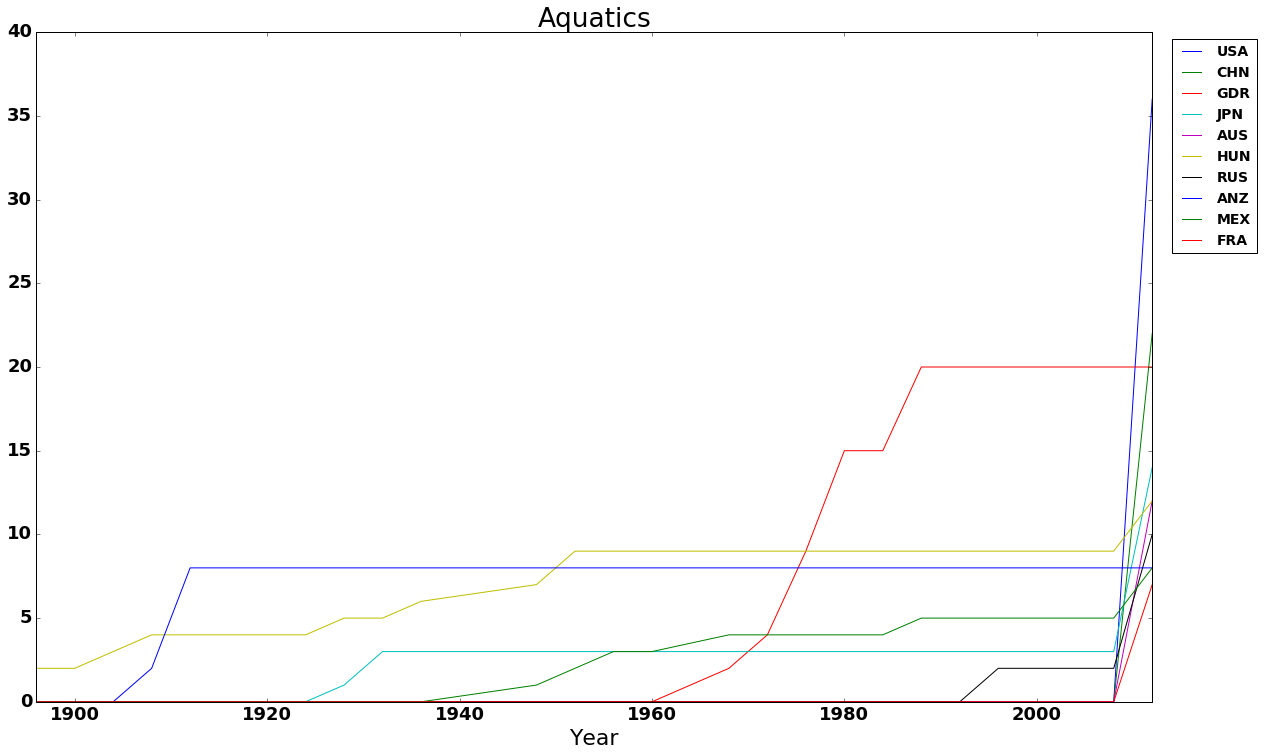

In [23]:
sport_name = 'Aquatics'
sport_df = data[data['Sport'] == sport_name]

# the medals in this list will be counted
# normally only ['Gold'] or ['Gold, 'Silver', 'Bronze'] will be considered
medal_to_include = ['Gold', 'Silver', 'Bronze']
medals_we_care = sport_df[sport_df['Medal'].map(lambda x: x in medal_to_include)]
print(medals_we_care.shape)


# build the pivot table
table = medals_we_care.drop(['Discipline', 'Event', 'Event gender', 'Sport'], 1).pivot_table(index=['NOC'], columns=['Year'], aggfunc='count')
table = table.fillna(0).reset_index()

# remove the multi-level columns
new_table = table['Medal']
# set index for as it's country name
new_table = new_table.set_index(table['NOC'])
# print(new_table.columns)

for i, year in enumerate(new_table.columns):
    # we add a col to the next column in each loop,
    # to make a cumulative chart
    if i == (len(new_table.columns) - 1):
        continue

    next_year = new_table.columns[i+1]
    if next_year == 'NOC':
        continue

    new_table[next_year] = new_table[year] + new_table[next_year]

new_table = new_table.sort_values(new_table.columns[-1], ascending=False)
topten = new_table.iloc[0:10, :]

# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
topten.T.plot.line(figsize=(20,12), fontsize=18, title=sport_name).legend(bbox_to_anchor=(1.10, 1.0), fontsize=14)